# 코스타리카의 가정 빈곤 수준 예측

- id : 개인 고유 번호
- idhogar : 각 가정 고유 번호
- parentesco1 : 가장
- Target : 예측 변수

In [87]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore',category=RuntimeWarning)

plt.style.use('fivethirtyeight')
plt.rcParams['font.size'] = 18
plt.rcParams['patch.edgecolor'] = 'k'

In [2]:
pd.options.display.max_columns = 150

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
train.head()

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,r4h3,r4m1,r4m2,r4m3,r4t1,r4t2,r4t3,tamhog,tamviv,escolari,rez_esc,hhsize,paredblolad,paredzocalo,paredpreb,pareddes,paredmad,paredzinc,paredfibras,paredother,pisomoscer,pisocemento,pisoother,pisonatur,pisonotiene,pisomadera,techozinc,techoentrepiso,techocane,techootro,cielorazo,abastaguadentro,abastaguafuera,abastaguano,public,planpri,noelec,coopele,sanitario1,sanitario2,sanitario3,sanitario5,sanitario6,energcocinar1,energcocinar2,energcocinar3,energcocinar4,elimbasu1,elimbasu2,elimbasu3,elimbasu4,elimbasu5,elimbasu6,epared1,epared2,epared3,etecho1,etecho2,etecho3,eviv1,eviv2,eviv3,dis,male,female,estadocivil1,estadocivil2,estadocivil3,estadocivil4,estadocivil5,estadocivil6,estadocivil7,parentesco1,parentesco2,parentesco3,parentesco4,parentesco5,parentesco6,parentesco7,parentesco8,parentesco9,parentesco10,parentesco11,parentesco12,idhogar,hogar_nin,hogar_adul,hogar_mayor,hogar_total,dependency,edjefe,edjefa,meaneduc,instlevel1,instlevel2,instlevel3,instlevel4,instlevel5,instlevel6,instlevel7,instlevel8,instlevel9,bedrooms,overcrowding,tipovivi1,tipovivi2,tipovivi3,tipovivi4,tipovivi5,computer,television,mobilephone,qmobilephone,lugar1,lugar2,lugar3,lugar4,lugar5,lugar6,area1,area2,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
0,ID_279628684,190000.0,0,3,0,1,1,0,NaN,0,1,1,0,0,0,0,1,1,1,1,10,NaN,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,21eb7fcc1,0,1,0,1,no,10,no,10.0,0,0,0,1,0,0,0,0,0,1,1.000000,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,1,0,43,100,1849,1,100,0,1.000000,0.0,100.0,1849,4
1,ID_f29eb3ddd,135000.0,0,4,0,1,1,1,1.0,0,1,1,0,0,0,0,1,1,1,1,12,NaN,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0e5d7a658,0,1,1,1,8,12,no,12.0,0,0,0,0,0,0,0,1,0,1,1.000000,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,1,0,67,144,4489,1,144,0,1.000000,64.0,144.0,4489,4
2,ID_68de51c94,NaN,0,8,0,1,1,0,NaN,0,0,0,0,1,1,0,1,1,1,1,11,NaN,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,2c7317ea8,0,1,1,1,8,no,11,11.0,0,0,0,0,1,0,0,0,0,2,0.500000,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,92,121,8464,1,0,0,0.250000,64.0,121.0,8464,4
3,ID_d671db89c,180000.0,0,5,0,1,1,1,1.0,0,2,2,1,1,2,1,3,4,4,4,9,1.0,4,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,2b58d945f,2,2,0,4,yes,11,no,11.0,0,0,0,1,0,0,0,0,0,3,1.333333,0,0,1,0,0,0,0,1,3,1,0,0,0,0,0,1,0,17,81,289,16,121,4,1.777778,1.0,121.0,289,4
4,ID_d56d6f5f5,180000.0,0,5,0,1,1,1,1.0,0,2,2,1,1,2,1,3,4,4,4,11,NaN,4,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2b58d945f,2,2,0,4,yes,11,no,11.0,0,0,0,0,1,0,0,0,0,3,1.333333,0,0,1,0,0,0,0,1,3,1,0,0,0,0,0,1,0,37,121,1369,16,121,4,1.777778,1.0,121.0,1369,4


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9557 entries, 0 to 9556
Columns: 143 entries, Id to Target
dtypes: float64(8), int64(130), object(5)
memory usage: 10.4+ MB


- 정수형 칼럼이 130개, 실수형 칼럼 8개, 문자열 5개로 구성되어있다.
- 정수형 칼럼은 아마 이진분류 형태(0 or 1)이거나 일반적인 변수일 것이다.
- 문자열은 머신러닝 모델에 직접적으로 영향을 못주기에 문제가 될 것이다.

In [4]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23856 entries, 0 to 23855
Columns: 142 entries, Id to agesq
dtypes: float64(8), int64(129), object(5)
memory usage: 25.8+ MB


- 하나 차이가 나는데 target열의 차이일 것이다.

### Integer Columns

Text(0.5, 1.0, 'Count of Unique Values in Integer Columns')

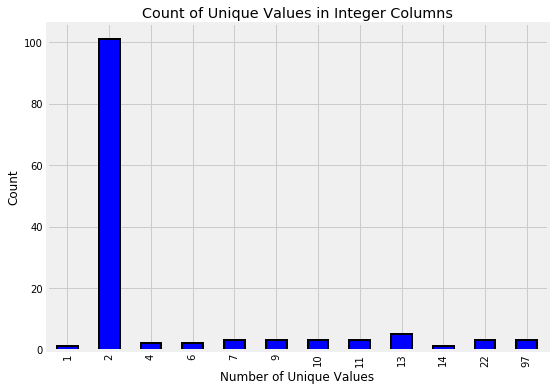

In [5]:
train.select_dtypes(np.int64).nunique().value_counts().sort_index().plot.bar(color = 'blue',
                                                                            figsize = (8,6),edgecolor = 'k',
                                                                            linewidth = 2)
plt.xlabel('Number of Unique Values')
plt.ylabel('Count')
plt.title('Count of Unique Values in Integer Columns')

- 값이 2개밖에 없는 integer 변수들이 많다.
- 이 boolean 정보는 가정 수준을 알려주기도 한다.

### Float Columns

- 연속형 변수이다.
- 모든 float 열로부터 분포 plot을 만들 수 있다.
- 빈곤 수준을 색과 매핑하여 OrderedDict를 사용
- target 값에 따라 색이 다르다.
- 이 것을 통해 우리는 훌륭한 차이점을 볼 수 있다.

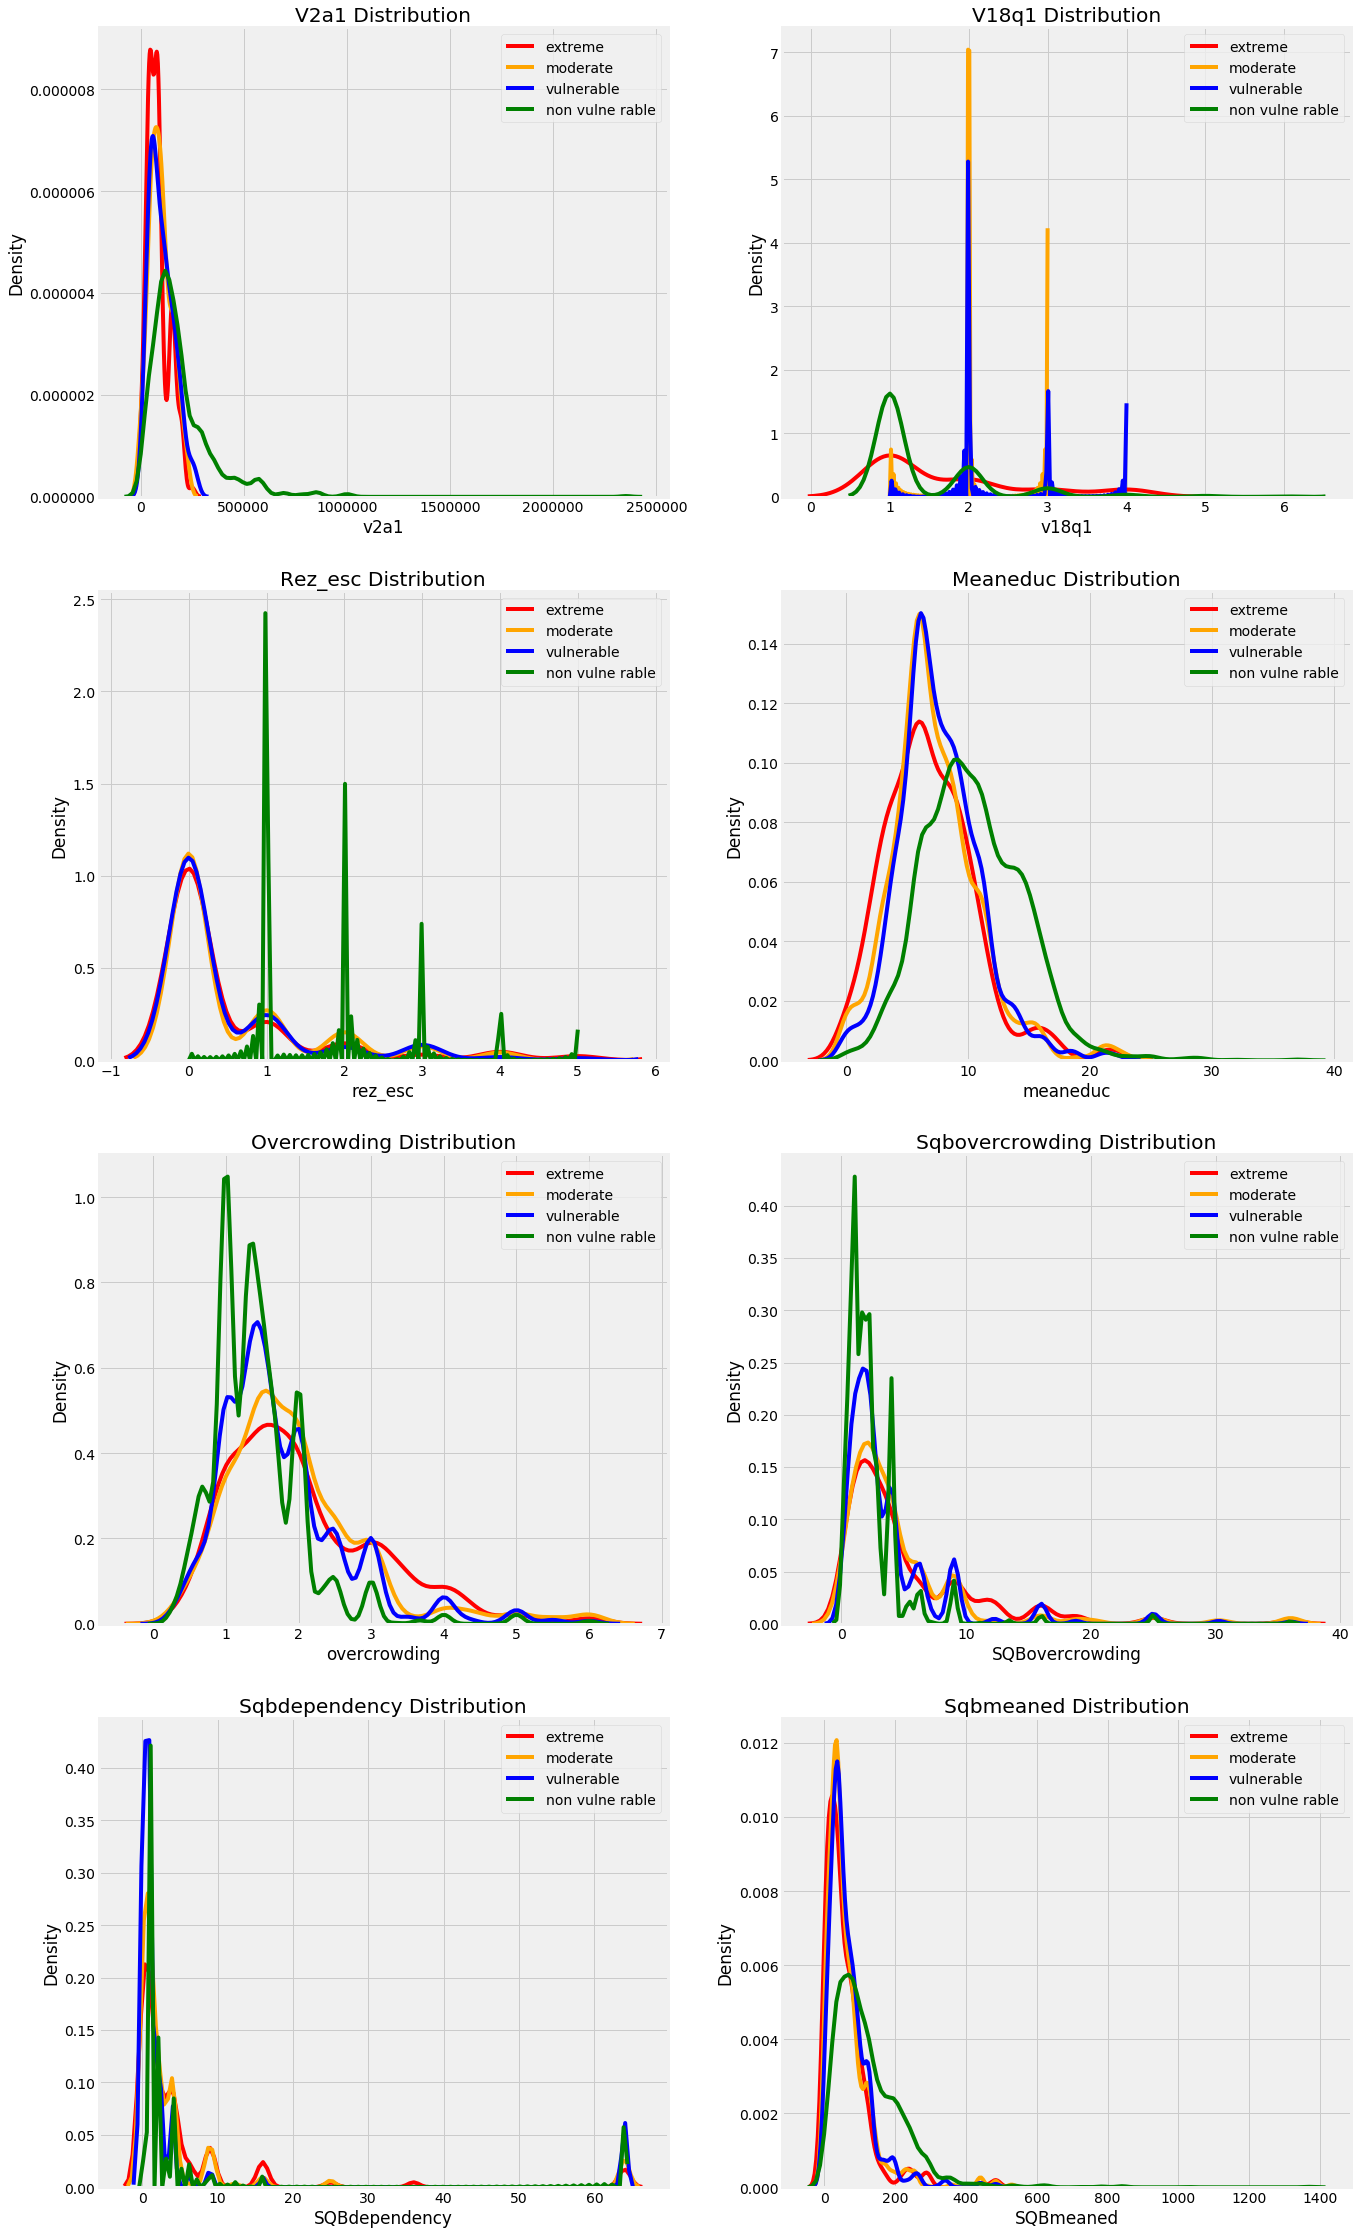

In [6]:
from collections import OrderedDict
plt.figure(figsize=(20,16))
plt.style.use('fivethirtyeight')

# Color mapping
colors = OrderedDict({1:'red',2 : "orange", 3 : "blue", 4 : 'green'})
poverty_mapping = OrderedDict({1 : 'extreme', 2 : 'moderate', 3 :'vulnerable', 4 : 'non vulne rable'})

# Iterate through the float columns

for i, col in enumerate(train.select_dtypes('float')) :
    ax = plt.subplot(4,2,i+1)
    
    for poverty_level, color in colors.items() :
        sns.kdeplot(train.loc[train['Target'] == poverty_level,col].dropna(),
                   ax =ax, color = color, label = poverty_mapping[poverty_level])
    plt.title(f'{col.capitalize()} Distribution')
    plt.xlabel(f'{col}')
    plt.ylabel('Density')
plt.subplots_adjust(top = 2)

### Object Columns


In [7]:
train.select_dtypes('object').head()

,Id,idhogar,dependency,edjefe,edjefa
0,ID_279628684,21eb7fcc1,no,10,no
1,ID_f29eb3ddd,0e5d7a658,8,12,no
2,ID_68de51c94,2c7317ea8,8,no,11
3,ID_d671db89c,2b58d945f,yes,11,no
4,ID_d56d6f5f5,2b58d945f,yes,11,no


- id와 idhogar는 identify된 변수들이다.
- 다른 변수들은 숫자와 문자열이 혼합되어있다.-> 머신러닝 전 조사할 필요 있다.
- dependency : 부양비율(<19 and >64 / 19<= <=64)
- edjefe : 남성 가장의 교육기간?
- edjefa : 여성 가장의 교육기간

In [8]:
mapping = {'yes' : 1, 'no' : 0}
for df in [train, test] :
    df['dependency'] = df['dependency'].replace(mapping).astype(np.float64)
    df['edjefa'] = df['edjefa'].replace(mapping).astype(np.float64)
    df['edjefe'] = df['edjefe'].replace(mapping).astype(np.float64)

In [9]:
train[['dependency','edjefe','edjefa']].describe()

,dependency,edjefe,edjefa
count,9557.000000,9557.000000,9557.000000
mean,1.149550,5.096788,2.896830
std,1.605993,5.246513,4.612056
min,0.000000,0.000000,0.000000
25%,0.333333,0.000000,0.000000
50%,0.666667,6.000000,0.000000
75%,1.333333,9.000000,6.000000
max,8.000000,21.000000,21.000000


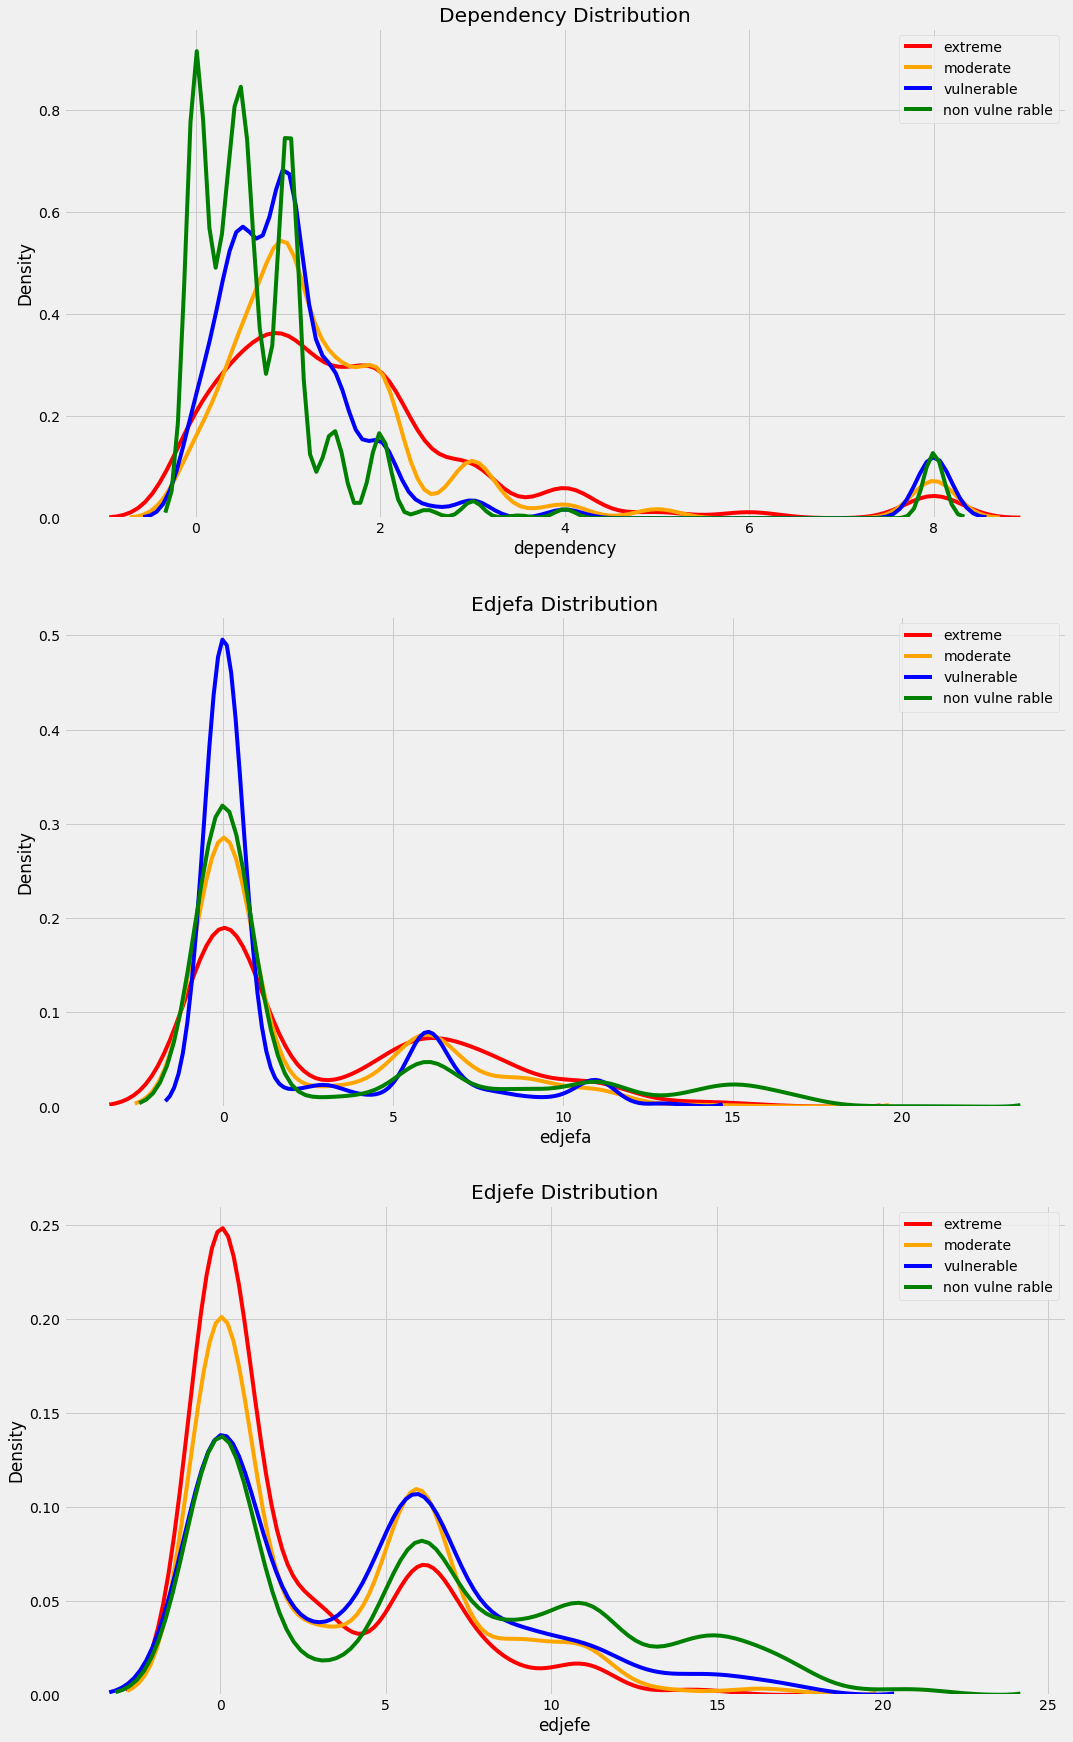

In [10]:
plt.figure(figsize = (16,12))

# Iterate through the float columns
for i, col in enumerate(['dependency', 'edjefa', 'edjefe']):
    ax = plt.subplot(3, 1, i + 1)
    # Iterate through the poverty levels
    for poverty_level, color in colors.items():
        # Plot each poverty level as a separate line
        sns.kdeplot(train.loc[train['Target'] == poverty_level, col].dropna(), 
                    ax = ax, color = color, label = poverty_mapping[poverty_level])
        
    plt.title(f'{col.capitalize()} Distribution'); plt.xlabel(f'{col}'); plt.ylabel('Density')

plt.subplots_adjust(top = 2)

In [11]:
test['Target'] = np.nan
data = train.append(test,ignore_index=True)

### Exploring Label Distribution

- parentesco1 == 1인 것들만 볼 것이다 -> 이 것이 의미하는 것은 가장이라서

In [12]:
heads = data.loc[data['parentesco1']==1].copy()

In [13]:
train_labels = data.loc[(data['Target'].notnull()) & (data['parentesco1'] == 1),
                       ['Target','idhogar']]

In [14]:
label_counts = train_labels['Target'].value_counts().sort_index()

1.0     222
2.0     442
3.0     355
4.0    1954
Name: Target, dtype: int64

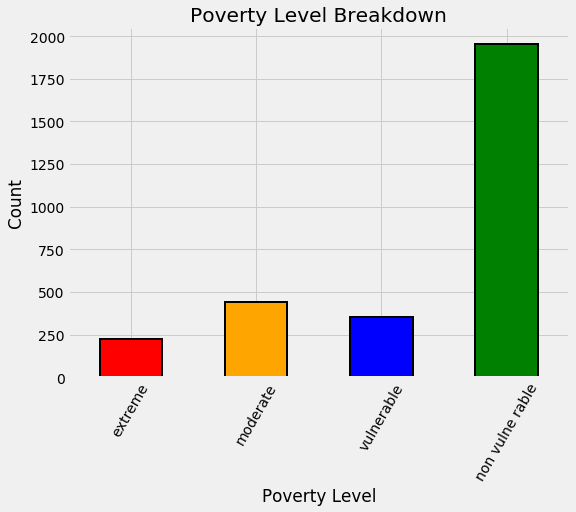

In [15]:
label_counts.plot.bar(figsize=(8,6),color = colors.values(),
                     edgecolor  = 'k', linewidth = 2)

plt.xlabel('Poverty Level')
plt.ylabel('Count')

plt.xticks([x-1 for x in poverty_mapping.keys()], # 파이썬은 0부터 숫자를 세기때문에 x-1
          list(poverty_mapping.values()),rotation = 60)
plt.title('Poverty Level Breakdown')

label_counts

- non_vulne_rable이 압도적으로 많다 -> imbalanced data
- imbalanced data의 문제는 모델은 less example들로  minority classes를 예측하기 어렵다

### Addressing Wrong Labels (결측값 처리)

#### Identify Errors

In [16]:
all_equal = train.groupby('idhogar')['Target'].apply(lambda x : x.nunique() == 1)

In [17]:
not_equal = all_equal[all_equal != True]

In [18]:
print('There are {} households where the family members do not all have the same target.'.format(len(not_equal)))

There are 85 households where the family members do not all have the same target.


##### Let's look at one example

In [19]:
train[train['idhogar'] == not_equal.index[0]][['idhogar','parentesco1','Target']]

,idhogar,parentesco1,Target
7651,0172ab1d9,0,3
7652,0172ab1d9,0,2
7653,0172ab1d9,0,3
7654,0172ab1d9,1,3
7655,0172ab1d9,0,2


- 가장(parentesco1 == 1)의 Target이 3이기때문에, 나머지 식구들도 3이여야한다.
- 하지만, 2인 사람들이 존재하고 있다.

#### Families without Heads of Household

- 위에처럼 틀린 것이 있다면, 가장과 같게 바꿔주면 된다. 
- 하지만, 가장이 없는 가구가 있다면 어떻게 해야할까?
- 또한 다 각각의 다른 값을 가지고 있다면?


In [20]:
households_leader = train.groupby('idhogar')['parentesco1'].sum()

In [21]:
households_no_head = train.loc[train['idhogar'].isin(households_leader[households_leader == 0].index),:]

In [22]:
print('There are {} households without a head'.format(households_no_head['idhogar'].nunique()))

There are 15 households without a head


In [23]:
households_no_head_equal = households_no_head.groupby('idhogar')['Target'].apply(lambda x : x.nunique() == 1)
print('{} Households with no head have different labels'.format(sum(households_no_head_equal == False)))

0 Households with no head have different labels


#### Correct Errors

In [24]:
for household in not_equal.index :
    
    true_target = int(train[(train['idhogar'] == household) & (train['parentesco1'] == 1.0)]['Target'])
    
    train.loc[train['idhogar'] == household, 'Target'] = true_target
    
all_equal = train.groupby('idhogar')['Target'].apply(lambda x: x.nunique() == 1)

not_equal = all_equal[all_equal != True]

print('There are {} households where the family members do not all have the same target.'.format(len(not_equal)))

There are 0 households where the family members do not all have the same target.


### Missing Values

In [25]:
missing = pd.DataFrame(data.isnull().sum()).rename(columns = {0 : 'total'})

In [26]:
missing['percent'] = missing['total'] / len(data)

missing.sort_values('percent',ascending = False).head(10).drop('Target')

,total,percent
rez_esc,27581,0.825457
v18q1,25468,0.762218
v2a1,24263,0.726154
SQBmeaned,36,0.001077
meaneduc,36,0.001077
hogar_adul,0,0.000000
parentesco10,0,0.000000
parentesco11,0,0.000000
parentesco12,0,0.000000


- rez_esc, v18q1, v2a1 이 3 칼럼을 봐야한다(결측값이 많은)

#### v18q1 : tablet 수
- 가족이 소유하고 있는 테블릿의 수를 의미한다.

#### Function to Plot Value Counts

In [27]:
def plot_value_counts(df, col, heads_only = False) :
    if heads_only :
        df = df.loc[df['parentesco'] == 1].copy()
    plt.figure(figsize = (8,6))
    df[col].value_counts().sort_index().plot.bar(color = 'blue',edgecolor = 'k',
                                                linewidth = 2)
    plt.xlabel(f'{col}')
    plt.title(f'{col} Value Counts')
    plt.ylabel('Count')
    plt.show()

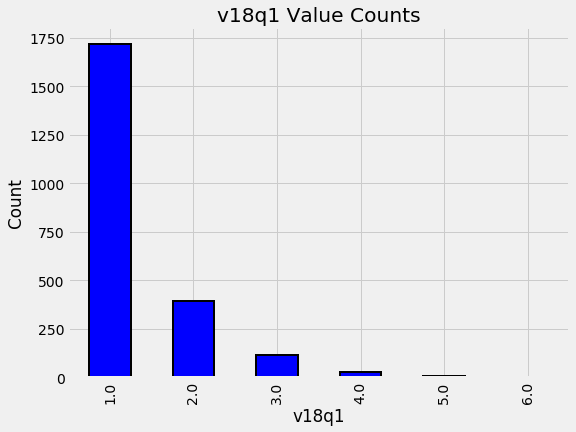

In [28]:
plot_value_counts(heads,'v18q1')

In [29]:
heads.groupby('v18q')['v18q1'].apply(lambda x: x.isnull().sum())

v18q
0    8044
1       0
Name: v18q1, dtype: int64

- v18q는 가족이 테블릿을 가지고 있는지 없는지 유무(0,1)

- v18q1의 결측값들은 다 v18q == 0인 값들이다. 즉, 테블릿을 소유하고 있지않다는 의미

In [30]:
data['v18q1'] = data['v18q1'].fillna(0)

#### v2a1 : 월세 납부
- v2a1을 보는 것과 함께, 'tipovivi_'의 분포를 보는 것도 흥미롭다. 
- tipovivi_ : 집이 자가인지, 월전세인지 알려준다. 
- 이 분포 plot을 통해, 결측값을 알아낼 수 있다.

In [31]:
own_variables = [x for x in data if x.startswith('tipo')]

In [32]:
data.loc[data['v2a1'].isnull(),own_variables].sum()

tipovivi1    20844
tipovivi2        0
tipovivi3        0
tipovivi4      597
tipovivi5     2822
dtype: int64

Text(0.5, 1.0, 'Home Ownership Status for Households Missing Rent Payments')

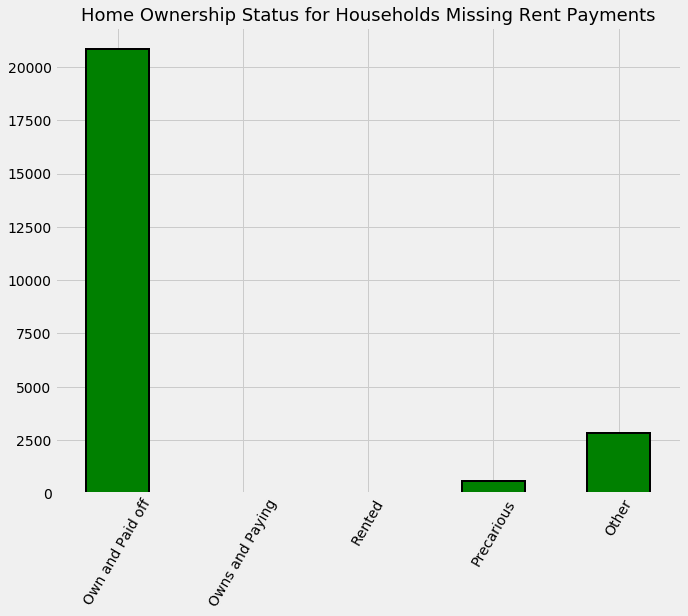

In [33]:
data.loc[data['v2a1'].isnull(),own_variables].sum().plot.bar(figsize=(10,8),color = 'green',
                                                            edgecolor = 'k', linewidth = 2)
plt.xticks([0,1,2,3,4],['Own and Paid off','Owns and Paying','Rented','Precarious','Other'],rotation = 60)
plt.title('Home Ownership Status for Households Missing Rent Payments',size = 18)

- 완전 자가
- 자가 + 할부 남음
- 전/월세
- Precarious?
- lh같은 느낌

In [34]:
data.loc[data['tipovivi1'] == 1,'v2a1'] = 0

- 완전 자가는 매달 돈을 지불할 필요가 없기에 결측값들을 0으로 처리

In [35]:
data['v2a1-missing'] = data['v2a1'].isnull()

In [36]:
data['v2a1-missing'].value_counts()

False    29994
True      3419
Name: v2a1-missing, dtype: int64

#### rez_esc : years behind in school
- 현재 학교에 들어간 아이가 없다는 의미

In [37]:
data.loc[data['rez_esc'].notnull()]['age'].describe()

count    5832.000000
mean       12.185700
std         3.198618
min         7.000000
25%         9.000000
50%        12.000000
75%        15.000000
max        17.000000
Name: age, dtype: float64

- 결측값 중에 제일 많은 나이는 17세

In [38]:
data.loc[data['rez_esc'].isnull()]['age'].describe()

count    27581.000000
mean        39.110656
std         20.983114
min          0.000000
25%         24.000000
50%         38.000000
75%         54.000000
max         97.000000
Name: age, dtype: float64

- 다른 discussion도 보게 되면, 이거는 7-19세 개인들에만 적용되는 변수라는 것을 알 수 있다.
- 7세-19세보다 적거나 많은 나이는 0으로 설정해야한다. 
- 7세보다 어리고 결측값이거나 19세보다 나이 많고 결측값이면 이는 0으로 처리해야한다.

In [39]:
data.loc[((data['age'] > 19) | (data['age'] < 7)) & (data['rez_esc'].isnull()),'rez_esc'] = 0

In [40]:
data['rez_esc-missing'] = data['rez_esc'].isnull()

- 또한 다른 discussion들을 봤으면, 'rez_esc'의 최대값은 5이다
- 5보다 큰 것들은 5로 수정

In [41]:
data.loc[data['rez_esc'] > 5, 'rez_esc']  =5

### Plot Two Categorical Variables

In [42]:
def plot_categoricals(x, y, data, annotate = True):
    """Plot counts of two categoricals.
    Size is raw count for each grouping.
    Percentages are for a given value of y."""
    
    # Raw counts 
    raw_counts = pd.DataFrame(data.groupby(y)[x].value_counts(normalize = False))
    raw_counts = raw_counts.rename(columns = {x: 'raw_count'})
    
    # Calculate counts for each group of x and y
    counts = pd.DataFrame(data.groupby(y)[x].value_counts(normalize = True))
    
    # Rename the column and reset the index
    counts = counts.rename(columns = {x: 'normalized_count'}).reset_index()
    counts['percent'] = 100 * counts['normalized_count']
    
    # Add the raw count
    counts['raw_count'] = list(raw_counts['raw_count'])
    
    plt.figure(figsize = (14, 10))
    # Scatter plot sized by percent
    plt.scatter(counts[x], counts[y], edgecolor = 'k', color = 'lightgreen',
                s = 100 * np.sqrt(counts['raw_count']), marker = 'o',
                alpha = 0.6, linewidth = 1.5)
    
    if annotate:
        # Annotate the plot with text
        for i, row in counts.iterrows():
            # Put text with appropriate offsets
            plt.annotate(xy = (row[x] - (1 / counts[x].nunique()), 
                               row[y] - (0.15 / counts[y].nunique())),
                         color = 'navy',
                         s = f"{round(row['percent'], 1)}%")
        
    # Set tick marks
    plt.yticks(counts[y].unique())
    plt.xticks(counts[x].unique())
    
    # Transform min and max to evenly space in square root domain
    sqr_min = int(np.sqrt(raw_counts['raw_count'].min()))
    sqr_max = int(np.sqrt(raw_counts['raw_count'].max()))
    
    # 5 sizes for legend
    msizes = list(range(sqr_min, sqr_max,
                        int(( sqr_max - sqr_min) / 5)))
    markers = []
    
    # Markers for legend
    for size in msizes:
        markers.append(plt.scatter([], [], s = 100 * size, 
                                   label = f'{int(round(np.square(size) / 100) * 100)}', 
                                   color = 'lightgreen',
                                   alpha = 0.6, edgecolor = 'k', linewidth = 1.5))
        
    # Legend and formatting
    plt.legend(handles = markers, title = 'Counts',
               labelspacing = 3, handletextpad = 2,
               fontsize = 16,
               loc = (1.10, 0.19))
    
    plt.annotate(f'* Size represents raw count while % is for a given y value.',
                 xy = (0, 1), xycoords = 'figure points', size = 10)
    
    # Adjust axes limits
    plt.xlim((counts[x].min() - (6 / counts[x].nunique()), 
              counts[x].max() + (6 / counts[x].nunique())))
    plt.ylim((counts[y].min() - (4 / counts[y].nunique()), 
              counts[y].max() + (4 / counts[y].nunique())))
    plt.grid(None)
    plt.xlabel(f"{x}")
    plt.ylabel(f"{y}")
    plt.title(f"{y} vs {x}")

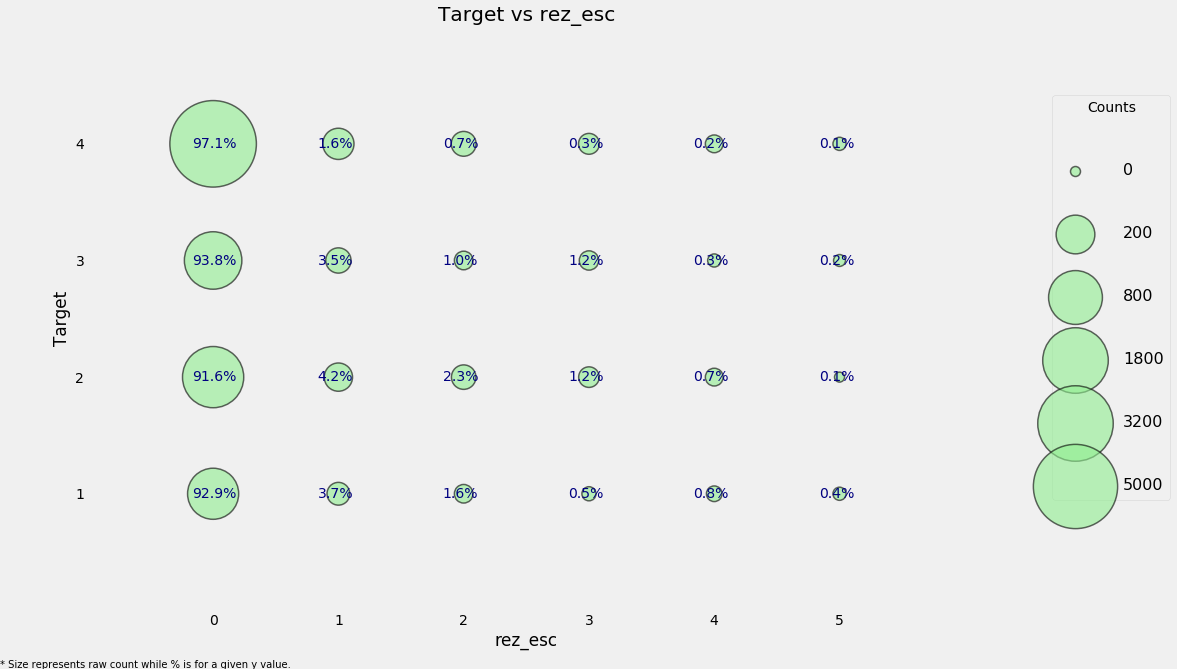

In [43]:
plot_categoricals('rez_esc','Target',data)

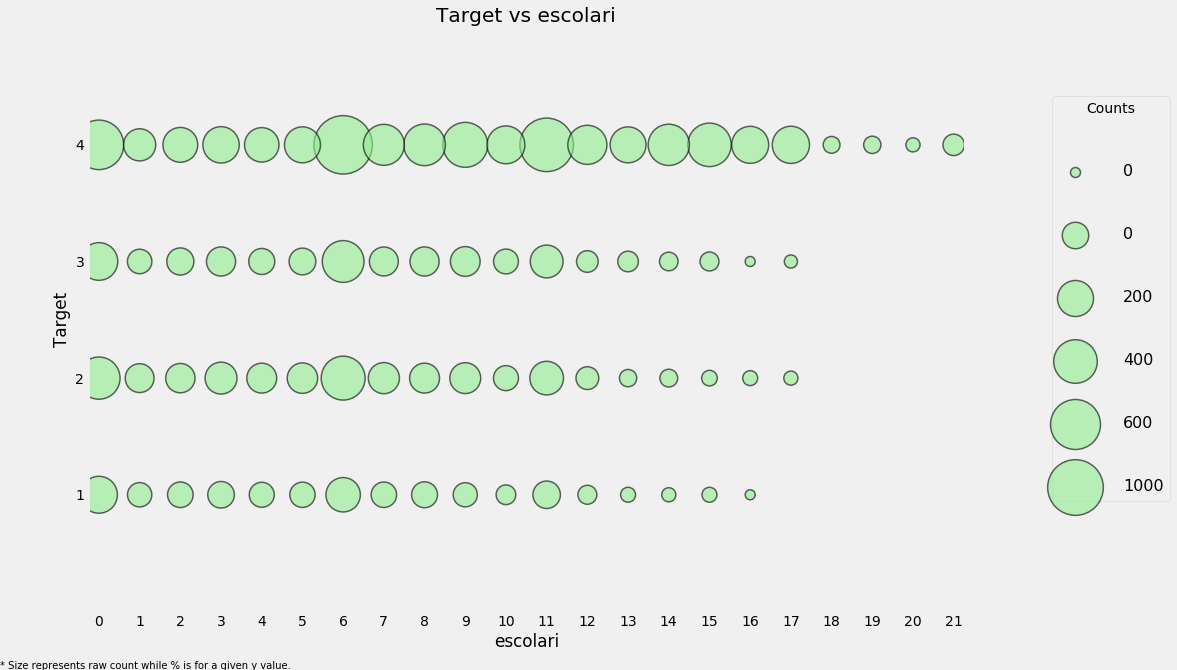

In [44]:
plot_categoricals('escolari','Target', data, annotate=False)

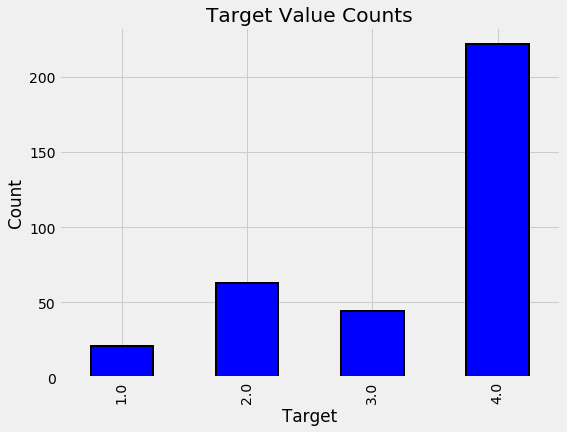

In [45]:
plot_value_counts(data[(data['rez_esc-missing'] == 1)],'Target')

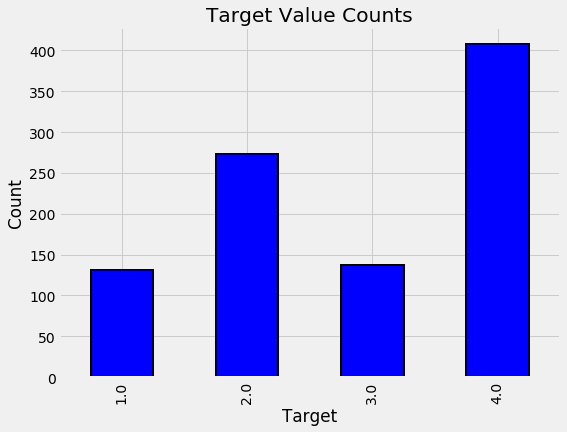

In [46]:
plot_value_counts(data[(data['v2a1-missing'] == 1)],'Target')

## Feature Engineering

In [47]:
id_ = ['Id', 'idhogar', 'Target']

In [48]:
ind_bool = ['v18q', 'dis', 'male', 'female', 'estadocivil1', 'estadocivil2', 'estadocivil3', 
            'estadocivil4', 'estadocivil5', 'estadocivil6', 'estadocivil7', 
            'parentesco1', 'parentesco2',  'parentesco3', 'parentesco4', 'parentesco5', 
            'parentesco6', 'parentesco7', 'parentesco8',  'parentesco9', 'parentesco10', 
            'parentesco11', 'parentesco12', 'instlevel1', 'instlevel2', 'instlevel3', 
            'instlevel4', 'instlevel5', 'instlevel6', 'instlevel7', 'instlevel8', 
            'instlevel9', 'mobilephone', 'rez_esc-missing']

ind_ordered = ['rez_esc', 'escolari', 'age']

In [49]:
hh_bool = ['hacdor', 'hacapo', 'v14a', 'refrig', 'paredblolad', 'paredzocalo', 
           'paredpreb','pisocemento', 'pareddes', 'paredmad',
           'paredzinc', 'paredfibras', 'paredother', 'pisomoscer', 'pisoother', 
           'pisonatur', 'pisonotiene', 'pisomadera',
           'techozinc', 'techoentrepiso', 'techocane', 'techootro', 'cielorazo', 
           'abastaguadentro', 'abastaguafuera', 'abastaguano',
            'public', 'planpri', 'noelec', 'coopele', 'sanitario1', 
           'sanitario2', 'sanitario3', 'sanitario5',   'sanitario6',
           'energcocinar1', 'energcocinar2', 'energcocinar3', 'energcocinar4', 
           'elimbasu1', 'elimbasu2', 'elimbasu3', 'elimbasu4', 
           'elimbasu5', 'elimbasu6', 'epared1', 'epared2', 'epared3',
           'etecho1', 'etecho2', 'etecho3', 'eviv1', 'eviv2', 'eviv3', 
           'tipovivi1', 'tipovivi2', 'tipovivi3', 'tipovivi4', 'tipovivi5', 
           'computer', 'television', 'lugar1', 'lugar2', 'lugar3',
           'lugar4', 'lugar5', 'lugar6', 'area1', 'area2', 'v2a1-missing']

hh_ordered = [ 'rooms', 'r4h1', 'r4h2', 'r4h3', 'r4m1','r4m2','r4m3', 'r4t1',  'r4t2', 
              'r4t3', 'v18q1', 'tamhog','tamviv','hhsize','hogar_nin',
              'hogar_adul','hogar_mayor','hogar_total',  'bedrooms', 'qmobilephone']

hh_cont = ['v2a1', 'dependency', 'edjefe', 'edjefa', 'meaneduc', 'overcrowding']

In [50]:
sqr_ = ['SQBescolari', 'SQBage', 'SQBhogar_total', 'SQBedjefe', 
        'SQBhogar_nin', 'SQBovercrowding', 'SQBdependency', 'SQBmeaned', 'agesq']

In [51]:
x = ind_bool + ind_ordered + hh_bool + hh_ordered + hh_cont + sqr_

In [52]:
from collections import Counter

In [53]:
print('There are no repeats : ',np.all(np.array(list(Counter(x).values())) == 1))
print('We covered every varaible : ', len(x) == data.shape[1])

There are no repeats :  True
We covered every varaible :  False


#### Squared Variables

- 제곱 변수 모든 것을 제거

Text(0.5, 1, 'Squared Age versus Age')

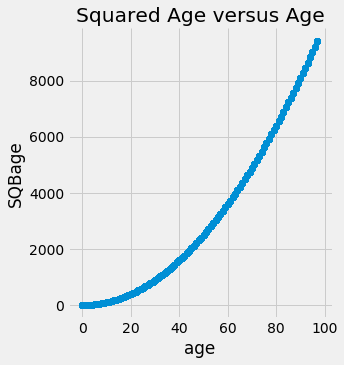

In [54]:
sns.lmplot('age','SQBage',data=data,fit_reg=False)
plt.title('Squared Age versus Age')

- 이 두변수가 상관관계를 보이기에 우리는 둘 다 쓸 필요 없다

In [55]:
data = data.drop(columns=sqr_)
data.shape

(33413, 136)

### Id Variables

### Household Level Variables

In [56]:
heads = data.loc[data['parentesco1'] == 1,:]

In [57]:
heads = heads[id_ + hh_bool + hh_cont + hh_ordered]

In [58]:
heads.shape

(10307, 99)

- 각각의 집안 수준을 예측하기때문에, 우리는 피쳐로서 이 변수들을 사용할 것이다
- 하지만, 우리는 불필요한 변수들은 제거하고, 데이터로부터 도출할 수 있는 더 많은 피쳐들을 추가해야한다.

### Redundant Household Variables

- 일단 household 변수들 모두에 관한 상관관계를 보자.
- 만약 너무 높은 상관관계가 나타나면, 우리는 높은 것 중 하나는 삭제해야한다.

In [59]:
corr_matrix = heads.corr()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape),k = 1).astype(np.bool))
to_drop = [column for column in upper.columns if any(abs(upper[column]) > 0.95)]
to_drop

['coopele', 'area2', 'tamhog', 'hhsize', 'hogar_total']

In [60]:
corr_matrix.loc[corr_matrix['tamhog'].abs() > 0.9, corr_matrix['tamhog'].abs() > 0.9]

,r4t3,tamhog,tamviv,hhsize,hogar_total
r4t3,1.000000,0.998287,0.910457,0.998287,0.998287
tamhog,0.998287,1.000000,0.909155,1.000000,1.000000
tamviv,0.910457,0.909155,1.000000,0.909155,0.909155
hhsize,0.998287,1.000000,0.909155,1.000000,1.000000
hogar_total,0.998287,1.000000,0.909155,1.000000,1.000000


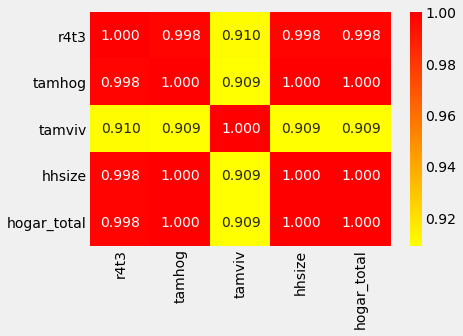

In [61]:
sns.heatmap(corr_matrix.loc[corr_matrix['tamhog'].abs() > 0.9, corr_matrix['tamhog'].abs() > 0.9],
            annot=True, cmap = plt.cm.autumn_r, fmt='.3f');

- r4t3 : 집안 가족 수 
- tamhog : 집안 크기
- tamviv : 집에 살고 있는 사람 수
- hhsize : 집 사이즈
- hogar_total : # of total individuals in the household

In [62]:
heads = heads.drop(columns=['tamhog','hogar_total','r4t3'])

Text(0.5, 1, 'Household size vs number of persons living in the household')

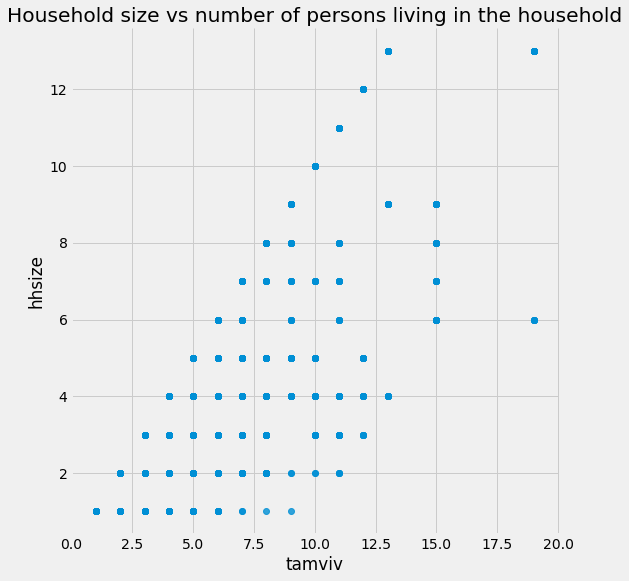

In [63]:
sns.lmplot('tamviv','hhsize',data,fit_reg=False,size = 8)
plt.title('Household size vs number of persons living in the household')

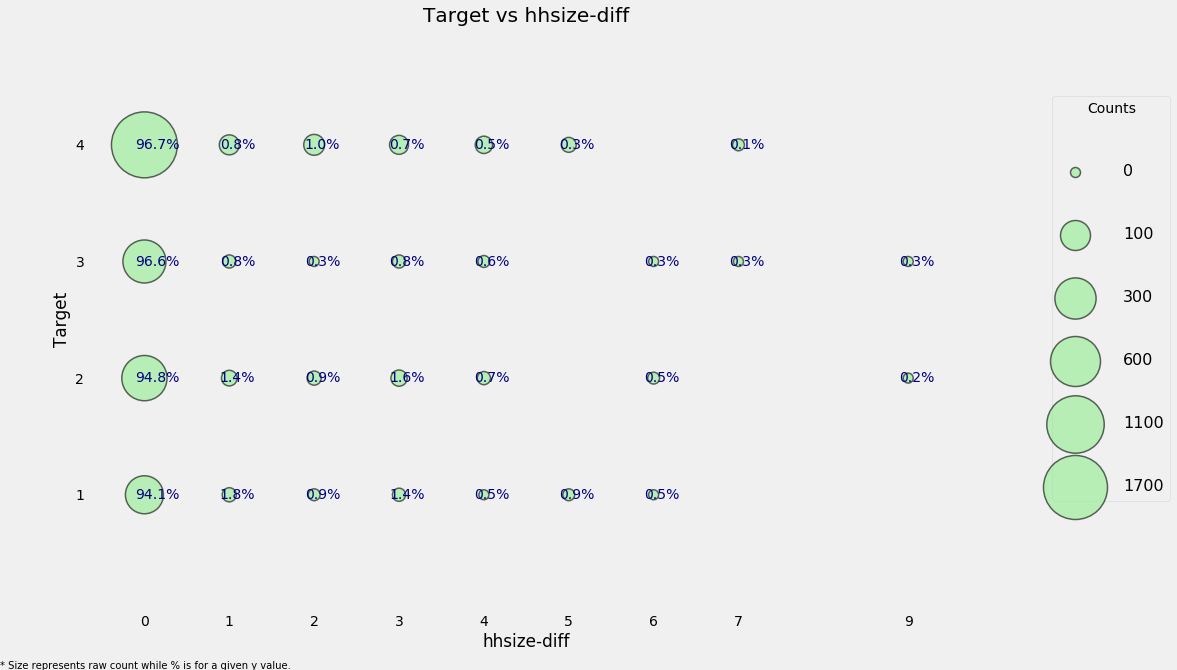

In [64]:
heads['hhsize-diff'] = heads['tamviv'] - heads['hhsize']
plot_categoricals('hhsize-diff','Target',heads)

#### Creating Oridinal Vairable

- 전기 관련 변수가 4개의 열로 구성되어있다
- 그래서 이를 합쳐준다

In [66]:
elec = []
for i, row in heads.iterrows() :
    if row['noelec'] == 1 :
        elec.append(0)
    elif row['coopele'] == 1 :
        elec.append(1)
    elif row['public'] == 1:
        elec.append(2)
    elif row['planpri'] == 1 :
        elec.append(3)
    else : 
        elec.append(np.nan)
        
heads['elec'] = elec
heads['elec-missing'] = heads['elec'].isnull()

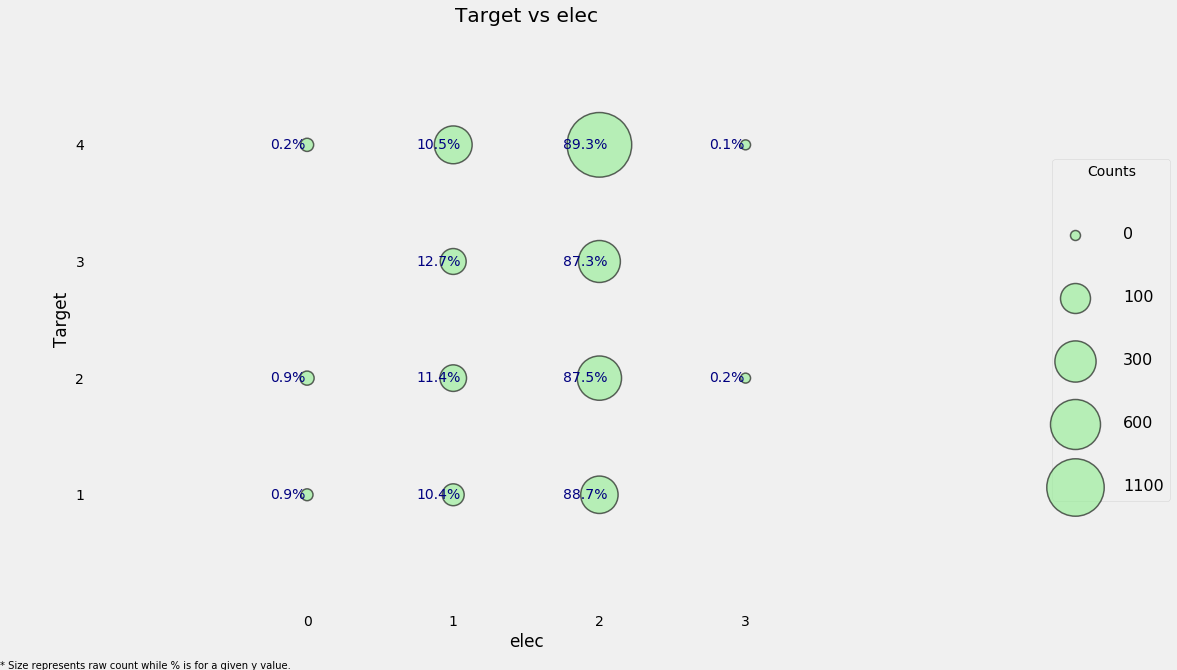

In [67]:
plot_categoricals('elec','Target',heads)

- area2는 필요하지않은 변수이다. 
- 이 변수는 그 집이 시골 지역인 것을 의미하지만 불필요하다. 왜냐하면, 도시 지역인지 아닌지 알려주는 열을 갖고 있다. 

In [68]:
heads = heads.drop(columns = 'area2')
heads.groupby('area1')['Target'].value_counts(normalize = True)

area1  Target
0      4.0       0.582249
       2.0       0.176331
       3.0       0.147929
       1.0       0.093491
1      4.0       0.687030
       2.0       0.137688
       3.0       0.108083
       1.0       0.067199
Name: Target, dtype: float64

### Creating Ordinal Variables

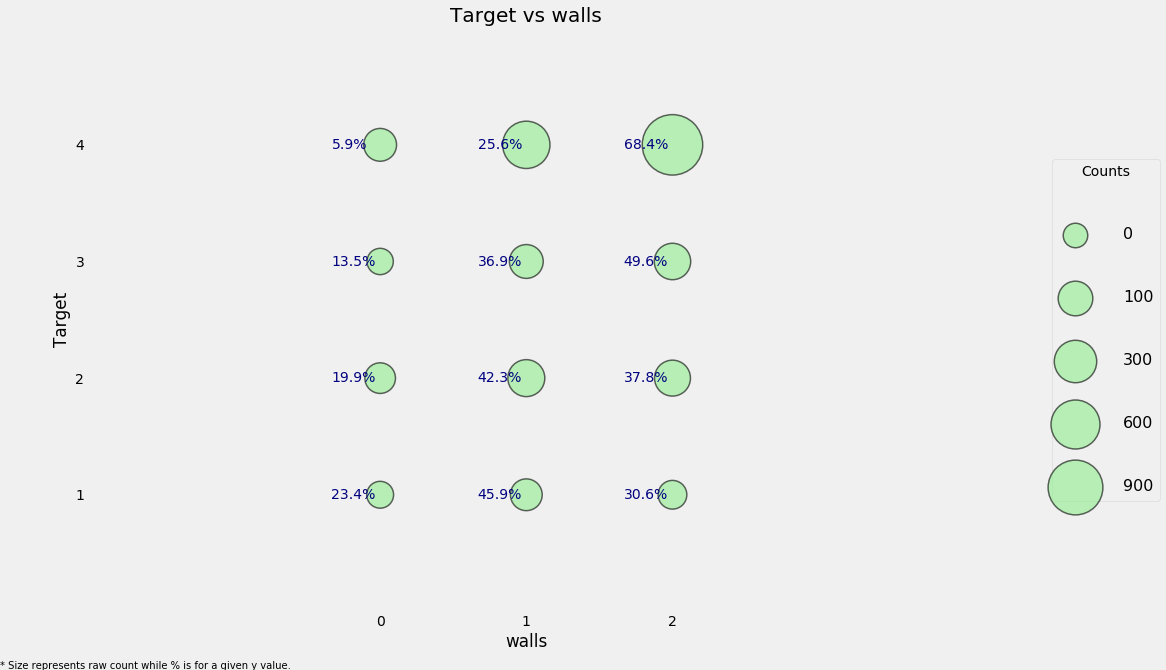

In [69]:
heads['walls'] = np.argmax(np.array(heads[['epared1','epared2','epared3']]),axis = 1)
plot_categoricals('walls','Target',heads)

In [70]:
heads['roof'] = np.argmax(np.array(heads[['etecho1', 'etecho2', 'etecho3']]),
                           axis = 1)
heads = heads.drop(columns = ['etecho1', 'etecho2', 'etecho3'])

# Floor ordinal variable
heads['floor'] = np.argmax(np.array(heads[['eviv1', 'eviv2', 'eviv3']]),
                           axis = 1)

### Feature Construction

- 변수들을 mapping하면서 ordinal features로 만들 수도 있고, 존재하는 변수로부터 새로운 변수들을 만들 수 있다.(feature construction)

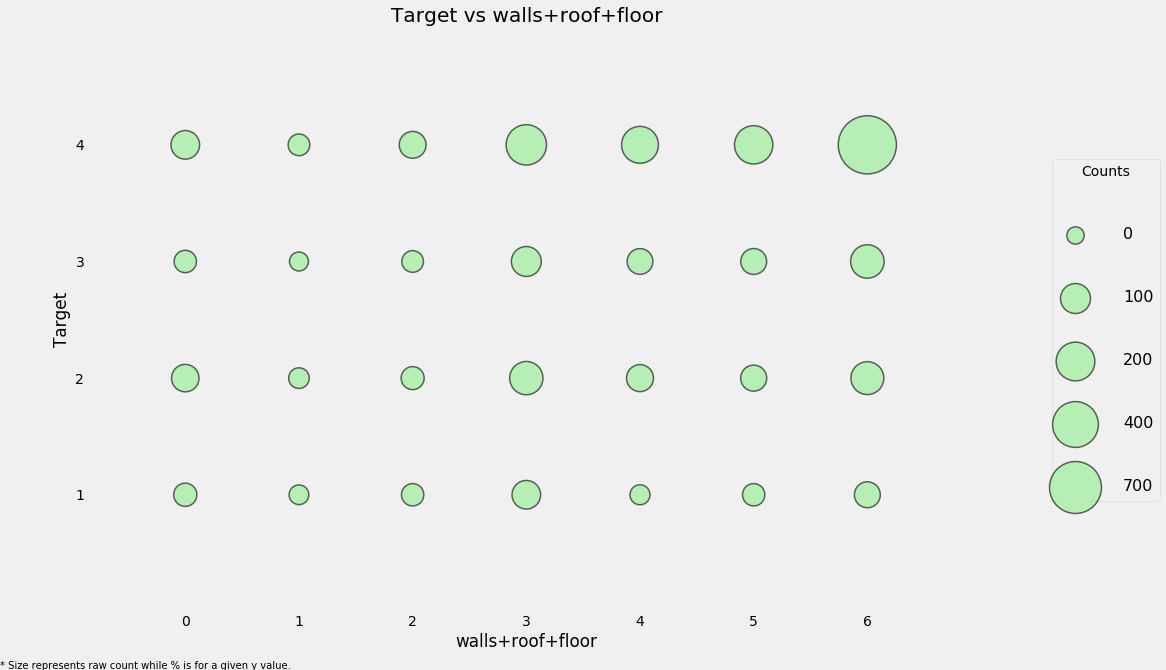

In [71]:
heads['walls+roof+floor'] = heads['walls'] + heads['roof'] + heads['floor']
plot_categoricals('walls+roof+floor','Target',heads,annotate=False)

- 새로 만든 이 feature는 유용해보인다.

In [72]:
counts = pd.DataFrame(heads.groupby(['walls+roof+floor'])['Target'].value_counts(normalize = True)).rename(
    columns = {'Target' : 'Normalized Count'}).reset_index()
counts.head()

,walls+roof+floor,Target,Normalized Count
0,0,4.0,0.376404
1,0,2.0,0.320225
2,0,1.0,0.162921
3,0,3.0,0.140449
4,1,4.0,0.323529


In [73]:
heads['warning'] = 1 * (heads['sanitario1'] + 
                         (heads['elec'] == 0) + 
                         heads['pisonotiene'] + 
                         heads['abastaguano'] + 
                         (heads['cielorazo'] == 0))

Text(0.5, 1.0, 'Target vs Warning Variable')

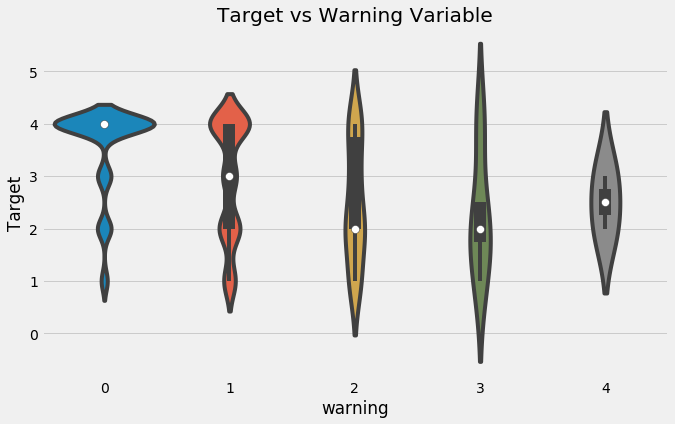

In [74]:
plt.figure(figsize = (10, 6))
sns.violinplot(x = 'warning', y = 'Target', data = heads);
plt.title('Target vs Warning Variable')

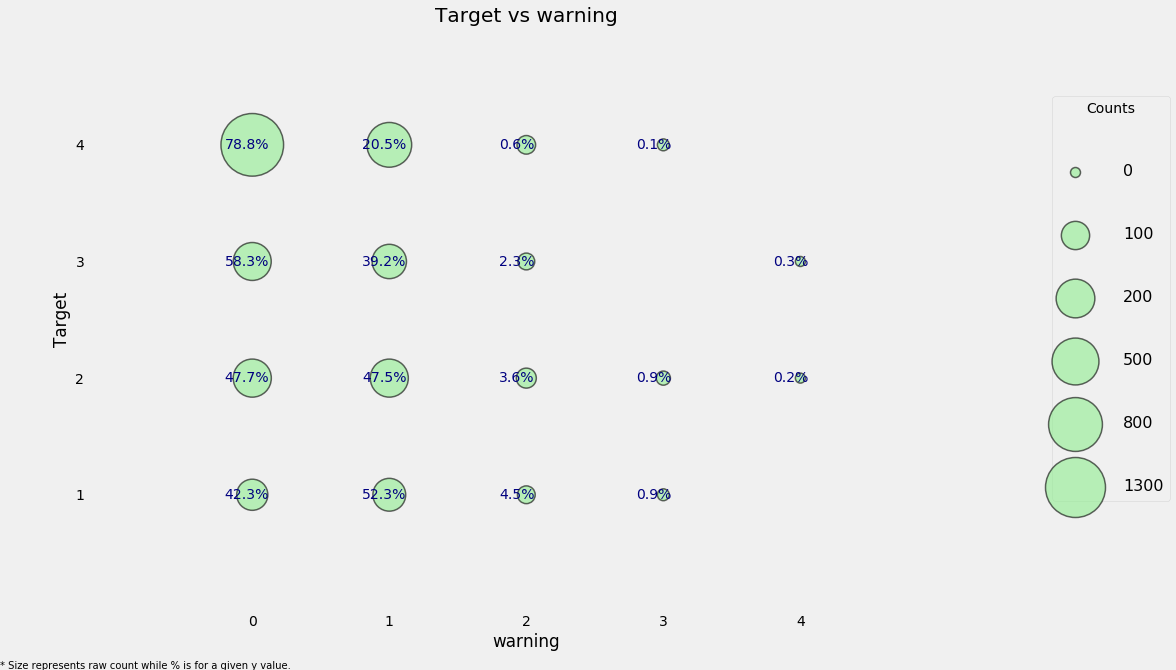

In [75]:
plot_categoricals('warning', 'Target',heads)

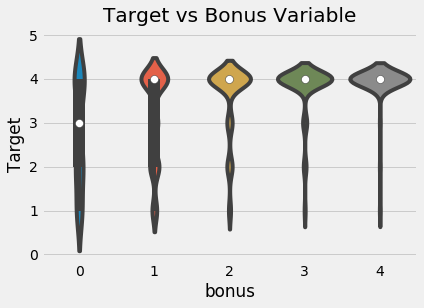

In [76]:
heads['bonus'] = 1 * (heads['refrig'] + 
                      heads['computer'] + 
                      (heads['v18q1'] > 0) + 
                      heads['television'])

sns.violinplot('bonus', 'Target', data = heads,
                figsize = (10, 6));
plt.title('Target vs Bonus Variable');

### Per Capita Features

In [77]:
heads['phones-per-capita'] = heads['qmobilephone'] / heads['tamviv']
heads['tablets-per-capita'] = heads['v18q1'] / heads['tamviv']
heads['rooms-per-capita'] = heads['rooms'] / heads['tamviv']
heads['rent-per-capita'] = heads['v2a1'] / heads['tamviv']

### Exploring Household Variables

- Target과의 관계를 알아봐야한다

#### 관계 측정 방법
- Pearson 상관계수 측정 : 두 변수들 간의 선형 관계를 측정(-1 ~ 1)
- Spearman 상관계수 측정 :  두 변수 의 순위 사이의 통계적 의존성을 측정하는 비모수적인 척도(-1 ~ 1)
- 단조적 관계를 측정한다. 단순히 한 변수가 증가할 때, 다른 변수가 증가하는지 감소하는지에 대한 관계만 알아본다.(선형x)

In [78]:
from scipy.stats import spearmanr

In [79]:
def plot_corrs(x,y) :
    spr = spearmanr(x,y).correlation
    pcr = np.corrcoef(x,y)[0,1]
    
    data = pd.DataFrame({'x' : x, 'y' : y})
    plt.figure(figsize=(6,4))
    sns.regplot('x','y',data = data, fit_reg=False)
    plt.title(f'Spearman : {round(spr,2)}, Pearson : {round(pcr,2)}')

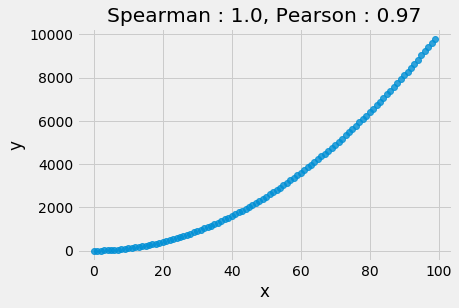

In [80]:
x = np.array(range(100))
y = x**2
plot_corrs(x,y)

- Spearman 관계는 종종 Target or the years of Education과 같은 ordinal 변수에 더 낫다고 한다.
- 현실에서 대부분의 관계는 선형이 아니며, 피어슨 상관관계는 두 변수가 얼마나 연관되어 있는지를 근사하게 보여주는 것일 수 있지만, 그것은 부정확하고 최선의 비교 방법이 아니다.

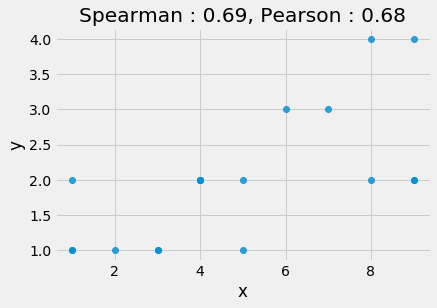

In [81]:
x = np.array([1, 1, 1, 2, 3, 3, 4, 4, 4, 5, 5, 6, 7, 8, 8, 9, 9, 9])
y = np.array([1, 2, 1, 1, 1, 1, 2, 2, 2, 2, 1, 3, 3, 2, 4, 2, 2, 4])

plot_corrs(x, y)

- 대부분, Spearman과 Pearson의 값은 매우 유사하다.

In [85]:
train_heads = heads.loc[heads['Target'].notnull(),:].copy()

pcorrs = pd.DataFrame(train_heads.corr()['Target'].sort_values()).rename(columns = {'Target' : 'pcorr'}).reset_index()
pcorrs = pcorrs.rename(columns = {'index' : 'feature'})

print('Most negatively correlated variables :')
print(pcorrs.head())

print('\nMost positvely correlated variables :')
print(pcorrs.dropna().tail())

Most negatively correlated variables :
        feature     pcorr
0       warning -0.301791
1     hogar_nin -0.266309
2          r4t1 -0.260917
3  overcrowding -0.234954
4         eviv1 -0.217908

Most positvely correlated variables :
               feature     pcorr
97   phones-per-capita  0.299026
98               floor  0.307605
99    walls+roof+floor  0.332446
100           meaneduc  0.333652
101             Target  1.000000


#### 음의 상관관계
- warning 변수가 증가하면, 빈곤 수준이 또한 증가한다. 
- hogar_nin은 가족 중에 0-19세의 수를 의미하는데, 이 또한 똑같다.(재정 때문)

#### 양의 상관관계
- meaneduc : 가정에서 어른들의 평균 교육 수준을 의미한다.

In [89]:
feats = []
scorr = []
pvalues = []

for c in heads :
    if heads[c].dtype != 'object' :
        feats.append(c)
        
        scorr.append(spearmanr(train_heads[c],train_heads['Target']).correlation)
        pvalues.append(spearmanr(train_heads[c],train_heads['Target']).pvalue)
        
scorrs = pd.DataFrame({'feature' : feats,'scorr':scorr, 'pvalue' : pvalues}).sort_values('scorr')

- Spearman은 pvalue라는 관계의 유의수준을 알려주는 지표도 중요하다.
- pvalue가 0.05보다 작으면 유용하다고 여겨진다.

In [90]:
print('Most negative Spearman correlations : ')
print(scorrs.head())

print('\n Most postive Spearman correlations : ')
print(scorrs.dropna().tail())

Most negative Spearman correlations : 
       feature     scorr        pvalue
97     warning -0.307326  4.682829e-66
68  dependency -0.281516  2.792620e-55
85   hogar_nin -0.236225  5.567218e-39
80        r4t1 -0.219226  1.112230e-33
49       eviv1 -0.217803  2.952571e-33

 Most postive Spearman correlations : 
              feature     scorr        pvalue
23          cielorazo  0.300996  2.611808e-63
95              floor  0.309638  4.466091e-67
99  phones-per-capita  0.337377  4.760104e-80
96   walls+roof+floor  0.338791  9.539346e-81
0              Target  1.000000  0.000000e+00


In [91]:
corrs = pcorrs.merge(scorrs, on = 'feature')
corrs['diff'] = corrs['pcorr'] - corrs['scorr']

corrs.sort_values('diff').head()

,feature,pcorr,scorr,pvalue,diff
77,rooms-per-capita,0.152185,0.223303,6.521453e-35,-0.071119
85,v18q1,0.197493,0.244200,1.282664e-41,-0.046708
87,tablets-per-capita,0.204638,0.248642,3.951568e-43,-0.044004
2,r4t1,-0.260917,-0.219226,1.112230e-33,-0.041691
97,phones-per-capita,0.299026,0.337377,4.760104e-80,-0.038351


In [92]:
corrs.sort_values('diff').dropna().tail()

,feature,pcorr,scorr,pvalue,diff
57,techozinc,0.014357,0.003404,8.528369e-01,0.010954
49,hogar_mayor,-0.025173,-0.041722,2.290994e-02,0.016549
88,edjefe,0.235687,0.214736,2.367521e-32,0.020951
66,edjefa,0.052310,0.005114,7.804715e-01,0.047197
17,dependency,-0.126465,-0.281516,2.792620e-55,0.155051


- 제일 차이 많이 나는 변수는 dependency이다. 
- dependency와 Target을 비교하며 scatterplot을 통해 관계를 시각화할 것이다.

Text(0.5, 1, 'Target vs Dependency')

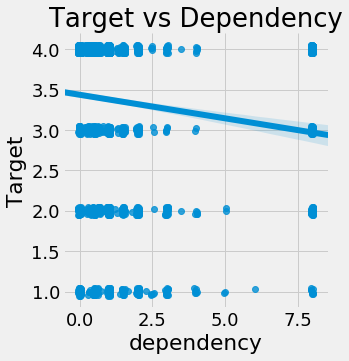

In [95]:
sns.lmplot('dependency','Target',fit_reg=True, data = train_heads, x_jitter= 0.05, y_jitter= 0.05)
plt.title('Target vs Dependency')

- 이산형 변수이기 때문에, jitter를 추가했다.

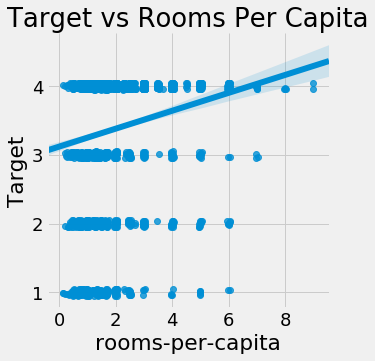

In [96]:
sns.lmplot('rooms-per-capita', 'Target', fit_reg = True, data = train_heads, x_jitter=0.05, y_jitter=0.05);
plt.title('Target vs Rooms Per Capita');

#### Correlation Heatmap

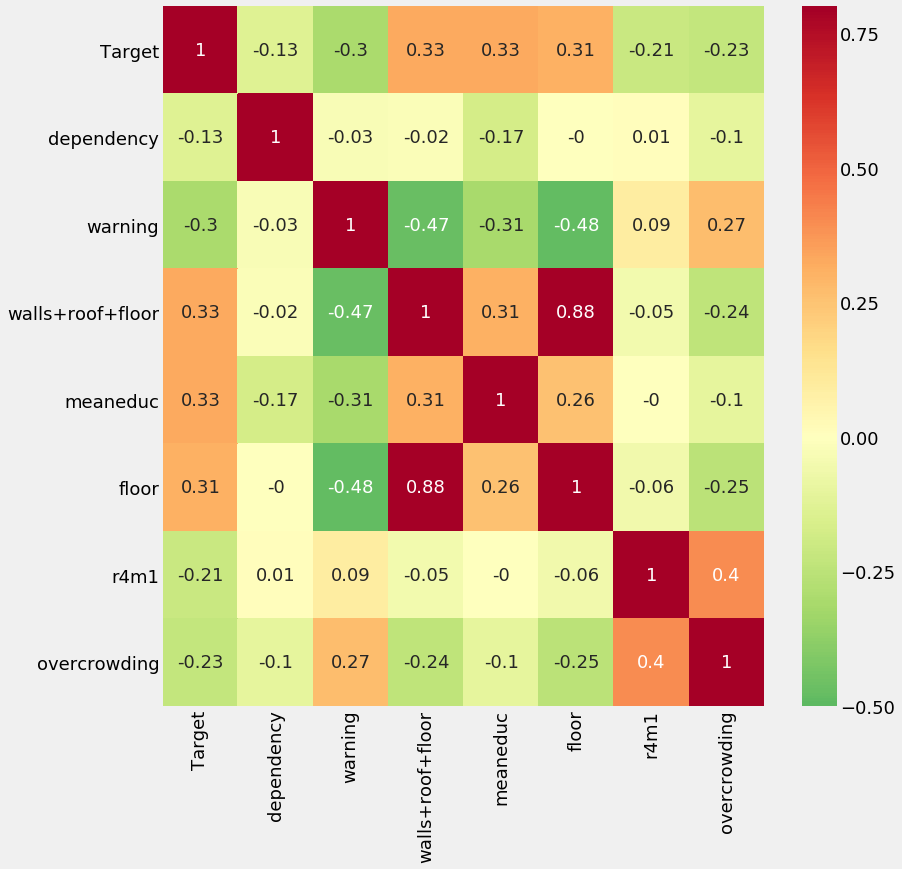

In [98]:
variables = ['Target','dependency','warning','walls+roof+floor','meaneduc','floor','r4m1','overcrowding']

corr_mat = train_heads[variables].corr().round(2)

plt.rcParams['font.size'] = 18
plt.figure(figsize = (12,12))
sns.heatmap(corr_mat,vmin = -0.5, vmax = 0.8, center = 0,
           cmap = plt.cm.RdYlGn_r,annot=True)

- floor와 floor+roof+floor는 공선성을 가지고 있다.

#### Features Plot

- Target과 가장 상관관계가 있는 변수들로 plot을 만들 것이다.
- scatterplot은 upper triangle
- kdeplot은 diagnoal
- 2d kdeplot은 lower triangle

Text(0.5, 1.05, 'Feature Plots Colored By Target')

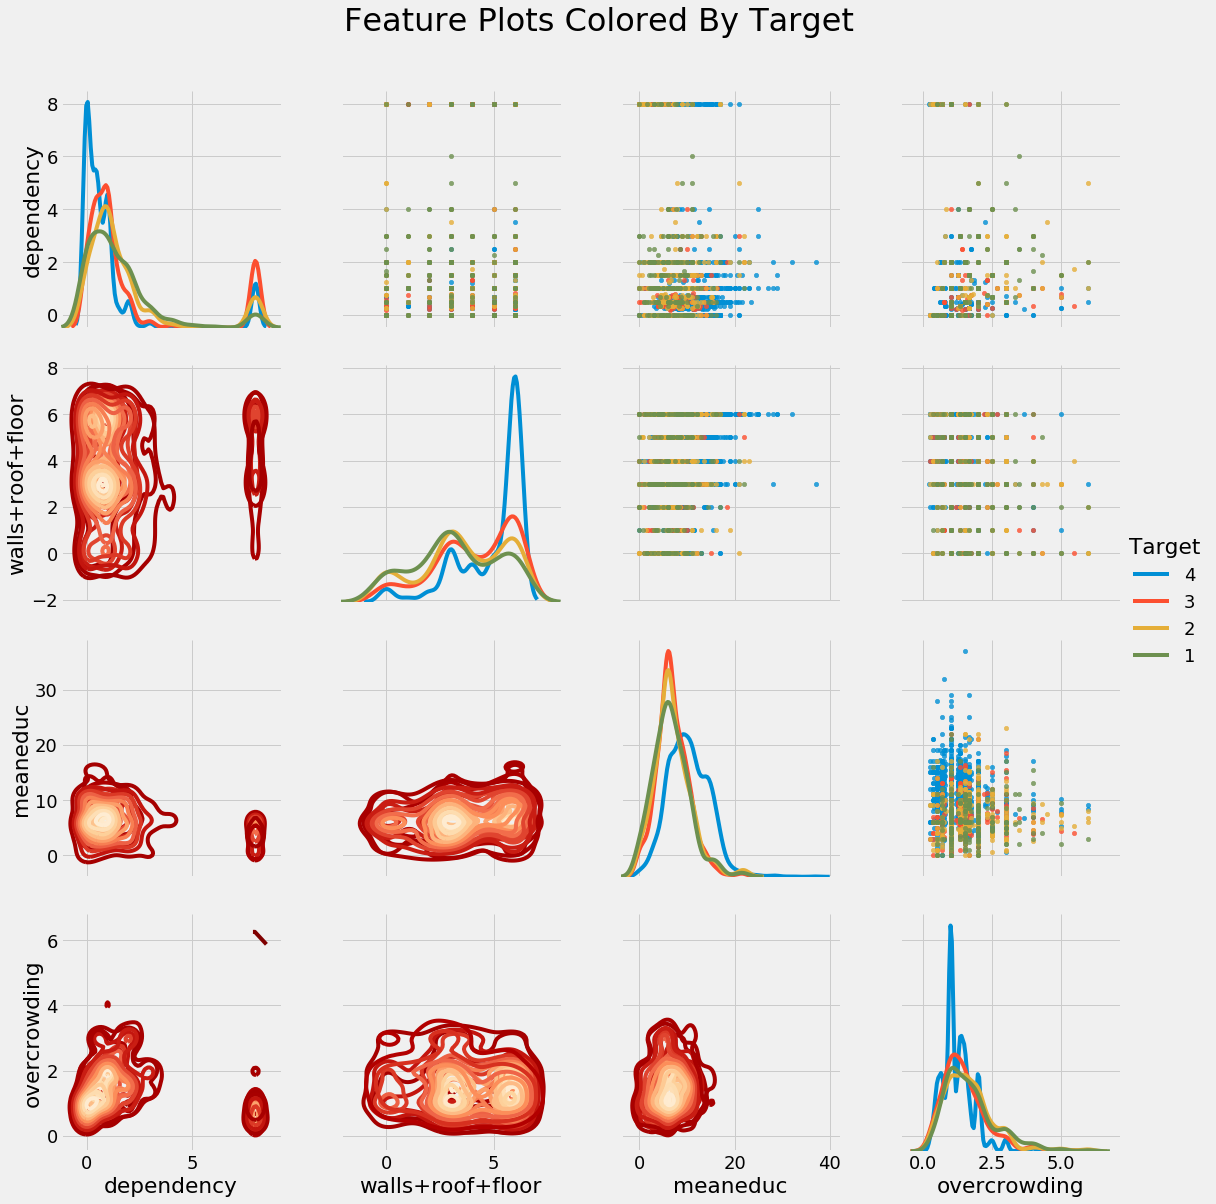

In [100]:
plot_data = train_heads[['Target','dependency','walls+roof+floor',
                        'meaneduc','overcrowding']]

grid = sns.PairGrid(data=plot_data, size = 4, diag_sharey=False,
                   hue = 'Target', hue_order = [4,3,2,1],
                   vars = [x for x in list(plot_data.columns) if x != 'Target'])

grid.map_upper(plt.scatter,alpha = 0.8, s = 20)

grid.map_diag(sns.kdeplot)

grid.map_lower(sns.kdeplot,cmap = plt.cm.OrRd_r)
grid = grid.add_legend()

plt.suptitle('Feature Plots Colored By Target', size = 32, y = 1.05)

In [101]:
household_feats = list(heads.columns)

## Individual Level Variables

- individual level 변수에는 두 개의 타입이 존재한다 -> Boolean(0 or 1)과 ordinal(이산형 변수)

In [103]:
ind = data[id_ + ind_bool + ind_ordered]
ind.shape

(33413, 40)

### Redundant Individual Variables

In [104]:
corr_matrix = ind.corr()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape),k = 1).astype(np.bool))

to_drop = [column for column in upper.columns if any(abs(upper[column]) > 0.95)]
to_drop

['female']

In [105]:
ind = ind.drop(columns = 'male')

### Creating Ordinal Variables

In [106]:
ind[[c for c in ind if c.startswith('instl')]].head()

,instlevel1,instlevel2,instlevel3,instlevel4,instlevel5,instlevel6,instlevel7,instlevel8,instlevel9
0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0
2,0,0,0,0,1,0,0,0,0
3,0,0,0,1,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0


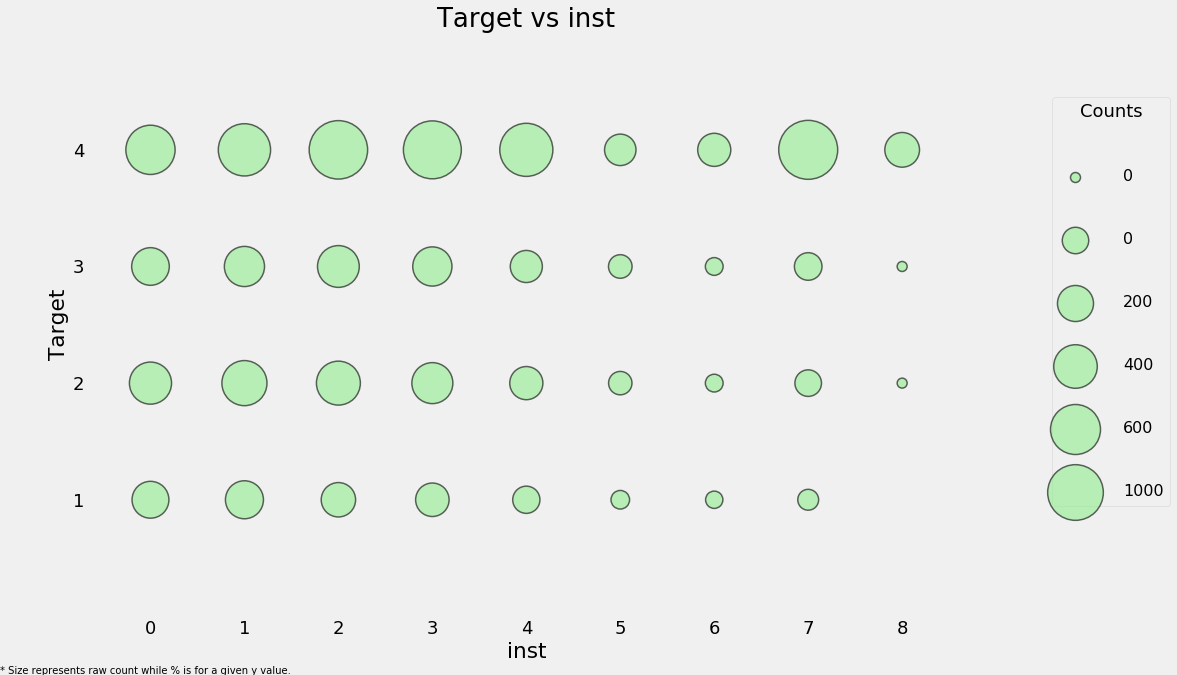

In [107]:
ind['inst'] = np.argmax(np.array(ind[[c for c in ind if c.startswith('instl')]]), axis = 1)

plot_categoricals('inst','Target',ind, annotate = False)

Text(0.5, 1.0, 'Education Distribution by Target')

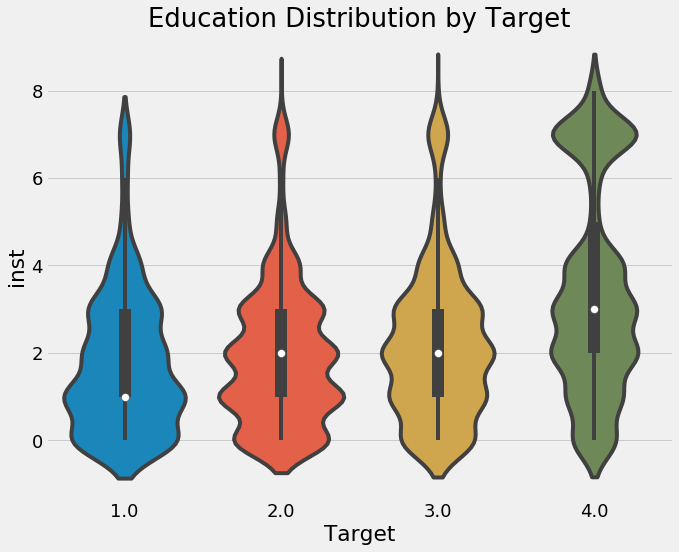

In [108]:
plt.figure(figsize = (10,8))
sns.violinplot(x = 'Target',y = 'inst',data = ind)
plt.title('Education Distribution by Target')

In [109]:
ind.shape

(33413, 40)

### Feature Construction

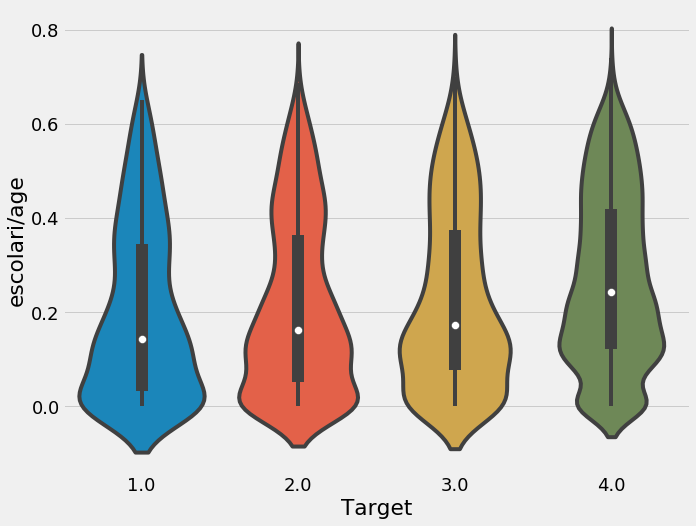

In [110]:
ind['escolari/age'] = ind['escolari'] / ind['age']

plt.figure(figsize=(10,8))
sns.violinplot('Target','escolari/age',data = ind)

In [111]:
ind['inst/age'] = ind['inst'] / ind['age']
ind['tech'] = ind['v18q'] + ind['mobilephone']

ind['tech'].describe()

count    33413.000000
mean         1.214886
std          0.462567
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          2.000000
Name: tech, dtype: float64

### Feature Engineering through Aggreagations

- 개인관련 데이터를 household데이터로 통합시켜야한다.
- idhogar로 groupby한 다음, agg로 데이터를 추가한다. 

In [122]:
range_ = lambda x: x.max() - x.min()
range_.__name__ = 'range_'

ind_agg = ind.drop(columns = 'Target').groupby('idhogar').agg(['min','max','sum','count','std',range_])
ind_agg.head()

v18q                           dis                                 \
           min max sum count  std range_ min max sum count       std range_   
idhogar                                                                       
000a08204    1   1   3     3  0.0      0   0   0   0     3  0.000000      0   
000bce7c4    0   0   0     2  0.0      0   0   1   1     2  0.707107      1   
001845fb0    0   0   0     4  0.0      0   0   0   0     4  0.000000      0   
001ff74ca    1   1   2     2  0.0      0   0   0   0     2  0.000000      0   
003123ec2    0   0   0     4  0.0      0   0   0   0     4  0.000000      0   

          female                                estadocivil1                \
             min max sum count       std range_          min max sum count   
idhogar                                                                      
000a08204      0   1   1     3  0.577350      1            0   1   1     3   
000bce7c4      0   1   1     2  0.707107      1            0   0   0     2   
001845fb0      0   1   2     4  0.577350      1            0   0   0     4   
001ff74ca      1   1   2     2  0.000000      0            0   1   1     2   
003123ec2      0   1   1     4  0.500000      1            0   1   2     4   

                           estadocivil2                                \
                std range_          min max sum count      std range_   
idhogar                                                                 
000a08204  0.577350      1            0   1   2     3  0.57735      1   
000bce7c4  0.000000      0            0   0   0     2  0.00000      0   
001845fb0  0.000000      0            0   1   2     4  0.57735      1   
001ff74ca  0.707107      1            0   0   0     2  0.00000      0   
003123ec2  0.577350      1            0   1   2     4  0.57735      1   

          estadocivil3                           estadocivil4                \
                   min max sum count  std range_          min max sum count   
idhogar                                                                       
000a08204            0   0   0     3  0.0      0            0   0   0     3   
000bce7c4            1   1   2     2  0.0      0            0   0   0     2   
001845fb0            0   0   0     4  0.0      0            0   0   0     4   
001ff74ca            0   0   0     2  0.0      0            0   0   0     2   
003123ec2            0   0   0     4  0.0      0            0   0   0     4   

                      estadocivil5                                 \
           std range_          min max sum count       std range_   
idhogar                                                             
000a08204  0.0      0            0   0   0     3  0.000000      0   
000bce7c4  0.0      0            0   0   0     2  0.000000      0   
001845fb0  0.0      0            0   0   0     4  0.000000      0   
001ff74ca  0.0      0            0   1   1     2  0.707107      1   
003123ec2  0.0      0            0   0   0     4  0.000000      0   

          estadocivil6                           estadocivil7                \
                   min max sum count  std range_          min max sum count   
idhogar                                                                       
000a08204            0   0   0     3  0.0      0            0   0   0     3   
000bce7c4            0   0   0     2  0.0      0            0   0   0     2   
001845fb0            0   0   0     4  0.0      0            0   1   2     4   
001ff74ca            0   0   0     2  0.0      0            0   0   0     2   
003123ec2            0   0   0     4  0.0      0            0   0   0     4   

                          parentesco1                                 \
               std range_         min max sum count       std range_   
idhogar                                                                
000a08204  0.00000      0           0   1   1     3  0.577350      1   
000bce7c4  0.00000      0           0   1   1     2  0.70710

In [123]:
new_col = []
for c in ind_agg.columns.levels[0]:
    for stat in ind_agg.columns.levels[1]:
        new_col.append(f'{c}-{stat}')
        
ind_agg.columns = new_col
ind_agg.head()

,v18q-min,v18q-max,v18q-sum,v18q-count,v18q-std,v18q-range_,dis-min,dis-max,dis-sum,dis-count,dis-std,dis-range_,female-min,female-max,female-sum,female-count,female-std,female-range_,estadocivil1-min,estadocivil1-max,estadocivil1-sum,estadocivil1-count,estadocivil1-std,estadocivil1-range_,estadocivil2-min,estadocivil2-max,estadocivil2-sum,estadocivil2-count,estadocivil2-std,estadocivil2-range_,estadocivil3-min,estadocivil3-max,estadocivil3-sum,estadocivil3-count,estadocivil3-std,estadocivil3-range_,estadocivil4-min,estadocivil4-max,estadocivil4-sum,estadocivil4-count,estadocivil4-std,estadocivil4-range_,estadocivil5-min,estadocivil5-max,estadocivil5-sum,estadocivil5-count,estadocivil5-std,estadocivil5-range_,estadocivil6-min,estadocivil6-max,estadocivil6-sum,estadocivil6-count,estadocivil6-std,estadocivil6-range_,estadocivil7-min,estadocivil7-max,estadocivil7-sum,estadocivil7-count,estadocivil7-std,estadocivil7-range_,parentesco1-min,parentesco1-max,parentesco1-sum,parentesco1-count,parentesco1-std,parentesco1-range_,parentesco2-min,parentesco2-max,parentesco2-sum,parentesco2-count,parentesco2-std,parentesco2-range_,parentesco3-min,parentesco3-max,parentesco3-sum,...,instlevel5-count,instlevel5-std,instlevel5-range_,instlevel6-min,instlevel6-max,instlevel6-sum,instlevel6-count,instlevel6-std,instlevel6-range_,instlevel7-min,instlevel7-max,instlevel7-sum,instlevel7-count,instlevel7-std,instlevel7-range_,instlevel8-min,instlevel8-max,instlevel8-sum,instlevel8-count,instlevel8-std,instlevel8-range_,instlevel9-min,instlevel9-max,instlevel9-sum,instlevel9-count,instlevel9-std,instlevel9-range_,mobilephone-min,mobilephone-max,mobilephone-sum,mobilephone-count,mobilephone-std,mobilephone-range_,rez_esc-min,rez_esc-max,rez_esc-sum,rez_esc-count,rez_esc-std,rez_esc-range_,escolari-min,escolari-max,escolari-sum,escolari-count,escolari-std,escolari-range_,age-min,age-max,age-sum,age-count,age-std,age-range_,inst-min,inst-max,inst-sum,inst-count,inst-std,inst-range_,escolari/age-min,escolari/age-max,escolari/age-sum,escolari/age-count,escolari/age-std,escolari/age-range_,inst/age-min,inst/age-max,inst/age-sum,inst/age-count,inst/age-std,inst/age-range_,tech-min,tech-max,tech-sum,tech-count,tech-std,tech-range_
idhogar,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
000a08204,1,1,3,3,0.0,0,0,0,0,3,0.000000,0,0,1,1,3,0.577350,1,0,1,1,3,0.577350,1,0,1,2,3,0.57735,1,0,0,0,3,0.0,0,0,0,0,3,0.0,0,0,0,0,3,0.000000,0,0,0,0,3,0.0,0,0,0,0,3,0.00000,0,0,1,1,3,0.577350,1,0,1,1,3,0.577350,1,0,1,1,...,3,0.0,0,0,0,0,3,0.0,0,0,0,0,3,0.0,0,0,1,2,3,0.577350,1,0,0,0,3,0.0,0,1,1,3,3,0.0,0,0.0,0.0,0.0,3,0.0,0.0,0,14,26,3,7.571878,14,4,30,62,3,14.468356,26,0,7,14,3,4.041452,7,0.000000,0.500000,0.900000,3,0.264575,0.500000,0.000000,0.250000,0.483333,3,0.139775,0.250000,2,2,6,3,0.0,0
000bce7c4,0,0,0,2,0.0,0,0,1,1,2,0.707107,1,0,1,1,2,0.707107,1,0,0,0,2,0.000000,0,0,0,0,2,0.00000,0,1,1,2,2,0.0,0,0,0,0,2,0.0,0,0,0,0,2,0.000000,0,0,0,0,2,0.0,0,0,0,0,2,0.00000,0,0,1,1,2,0.707107,1,0,1,1,2,0.707107,1,0,0,0,...,2,0.0,0,0,0,0,2,0.0,0,0,0,0,2,0.0,0,0,0,0,2,0.000000,0,0,0,0,2,0.0,0,1,1,2,2,0.0,0,0.0,0.0,0.0,2,0.0,0.0,0,5,5,2,3.535534,5,60,63,123,2,2.121320,3,0,1,1,2,0.707107,1,0.000000,0.083333,0.083333,2,0.058926,0.083333,0.000000,0.016667,0.016667,2,0.011785,0.016667,1,1,2,2,0.0,0
001845fb0,0,0,0,4,0.0,0,0,0,0,4,0.000000,0,0,1,2,4,0.577350,1,0,0,0,4,0.000000,0,0,1,2,4,0.57735,1,0,0,0,4,0.0,0,0,0,0,4,0.0,0,0,0,0,4,0.000000,0,0,0,0,4,0.0,0,0,1,2,4,0.57735,1,0,1,1,4,0.500000,1,0,1,1,4,0.500000,1,0,1,2,...,4,0.5,1,0,0,0,4,0.0,0,0,0,0,4,0.0,0,0,1,1,4,0.500000,1,0,0,0,4,0.0,0,1,1,4,4,0.0,0,0.0,0.0,0.0,3,0.0,0.0,6,14,41,4,3.304038,8,19,52,142,4,16.421531,33,2,7,16,4,2.160247,5,0.115385,0.526316,1.397906,4,0.183106,0.410931,0.038462,0.166667,0.511959,4,0.060123,0.128205,1,1,4,4,0.0,0
001ff74ca,1,1,2,2,0.0,0,0,0,0,2,0.000000,0,1,1,2,2,0.000000,0,0,1,1,2,0.707107,1,0,0,0,2,0.00

In [124]:
ind_agg.iloc[:,[0,1,2,3,6,7,8,9]].head()

,v18q-min,v18q-max,v18q-sum,v18q-count,dis-min,dis-max,dis-sum,dis-count
idhogar,,,,,,,,
000a08204,1,1,3,3,0,0,0,3
000bce7c4,0,0,0,2,0,1,1,2
001845fb0,0,0,0,4,0,0,0,4
001ff74ca,1,1,2,2,0,0,0,2
003123ec2,0,0,0,4,0,0,0,4


### Feature Selection

In [125]:
corr_matrix = ind_agg.corr()

upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

to_drop = [column for column in upper.columns if any(abs(upper[column] )> 0.95)]

print(f'There are {len(to_drop)} correlated columns to remove.')

There are 111 correlated columns to remove.


In [126]:
ind_agg = ind_agg.drop(columns = to_drop)
ind_feats = list(ind_agg.columns)

# Merge on the household id
final = heads.merge(ind_agg, on = 'idhogar', how = 'left')

print('Final features shape: ', final.shape)

Final features shape:  (10307, 228)


In [127]:
final.head()

,Id,idhogar,Target,hacdor,hacapo,v14a,refrig,paredblolad,paredzocalo,paredpreb,pisocemento,pareddes,paredmad,paredzinc,paredfibras,paredother,pisomoscer,pisoother,pisonatur,pisonotiene,pisomadera,techozinc,techoentrepiso,techocane,techootro,cielorazo,abastaguadentro,abastaguafuera,abastaguano,public,planpri,noelec,coopele,sanitario1,sanitario2,sanitario3,sanitario5,sanitario6,energcocinar1,energcocinar2,energcocinar3,energcocinar4,elimbasu1,elimbasu2,elimbasu3,elimbasu4,elimbasu5,elimbasu6,epared1,epared2,epared3,eviv1,eviv2,eviv3,tipovivi1,tipovivi2,tipovivi3,tipovivi4,tipovivi5,computer,television,lugar1,lugar2,lugar3,lugar4,lugar5,lugar6,area1,v2a1-missing,v2a1,dependency,edjefe,edjefa,meaneduc,overcrowding,...,parentesco6-max,parentesco6-sum,parentesco7-min,parentesco7-max,parentesco8-min,parentesco8-max,parentesco9-min,parentesco9-max,parentesco9-sum,parentesco10-min,parentesco10-max,parentesco11-min,parentesco11-max,parentesco11-sum,parentesco12-min,parentesco12-max,parentesco12-sum,instlevel1-min,instlevel1-max,instlevel1-sum,instlevel2-min,instlevel2-max,instlevel2-sum,instlevel2-std,instlevel3-min,instlevel3-max,instlevel3-sum,instlevel3-std,instlevel4-min,instlevel4-max,instlevel4-sum,instlevel4-std,instlevel5-min,instlevel5-max,instlevel5-sum,instlevel6-min,instlevel6-max,instlevel7-min,instlevel7-max,instlevel8-min,instlevel8-max,instlevel8-sum,instlevel8-std,instlevel9-min,instlevel9-max,mobilephone-min,mobilephone-std,mobilephone-range_,rez_esc-min,rez_esc-max,escolari-min,escolari-max,escolari-sum,escolari-std,escolari-range_,age-min,age-max,age-sum,age-std,age-range_,inst-max,inst-std,inst-range_,escolari/age-min,escolari/age-max,escolari/age-sum,escolari/age-std,escolari/age-range_,inst/age-max,inst/age-std,inst/age-range_,tech-min,tech-sum,tech-std,tech-range_
0,ID_279628684,21eb7fcc1,4.0,0,0,1,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,False,190000.0,0.0,10.0,0.0,10.0,1.000000,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,0,0,NaN,1,1,1,NaN,0,0,0,0,0,0,0,0,0,0,NaN,0,0,1,NaN,0,0.0,0.0,10,10,10,NaN,0,43,43,43,NaN,0,3,NaN,0,0.232558,0.232558,0.232558,NaN,0.000000,0.069767,NaN,0.000000,1,1,NaN,0
1,ID_f29eb3ddd,0e5d7a658,4.0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,False,135000.0,8.0,12.0,0.0,12.0,1.000000,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,0,0,NaN,0,0,0,NaN,0,0,0,0,0,0,0,1,1,1,NaN,0,0,1,NaN,0,0.0,0.0,12,12,12,NaN,0,67,67,67,NaN,0,7,NaN,0,0.179104,0.179104,0.179104,NaN,0.000000,0.104478,NaN,0.000000,2,2,NaN,0
2,ID_68de51c94,2c7317ea8,4.0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,False,0.0,8.0,0.0,11.0,11.0,0.500000,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,0,0,NaN,0,0,0,NaN,1,1,1,0,0,0,0,0,0,0,NaN,0,0,0,NaN,0,0.0,0.0,11,11,11,NaN,0,92,92,92,NaN,0,4,NaN,0,0.119565,0.119565,0.119565,NaN,0.000000,0.043478,NaN,0.000000,0,0,NaN,0
3,ID_ec05b1a7b,2b58d945f,4.0,0,0,1,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,False,180000.0,1.0,11.0,0.0,11.0,1.333333,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0.5,0,0,0,0.0,0,1,1,0.5,0,1,2,0,0,0,0,0,0,0,0.0,0,0,1,0.0,0,0.0,1.0,2,11,33,4.272002,9,8,38,100,14.899664,30,4,1.414214,3,0.250000,0.529412,1.366183,0.126943,0.279412,0.176471,0.033010,0.071207,2,8,0.0,0
4,ID_1284f8aad,d6dae86b7,4.0,1,0,1,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,False,130000.0,1.0,9.0,0.0,10.0,4.000000,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,1,0.5,0,0,0,0.0,0,1,1,0.5,0,1,1,0,0,0,0,0,0,0,0.0,0,0,1,0.0,0,0.0,1.0,0,11,23,5.123475,11,7,30,76,11.690452,23,4,1.825742,4,0.000000,0.392857,0.965584,0.168946,0.392857,0.142857,0.060063,0.142857,1,4,0.0,0


### Final Data Exploration

In [128]:
corrs = final.corr()['Target']
corrs.sort_values().head()

warning          -0.301791
instlevel2-sum   -0.297868
instlevel1-sum   -0.271204
hogar_nin        -0.266309
r4t1             -0.260917
Name: Target, dtype: float64

In [129]:
corrs.sort_values().dropna().tail()

walls+roof+floor    0.332446
meaneduc            0.333652
inst-max            0.368229
escolari-max        0.373091
Target              1.000000
Name: Target, dtype: float64

TypeError: <lambda>() takes 1 positional argument but 3 were given

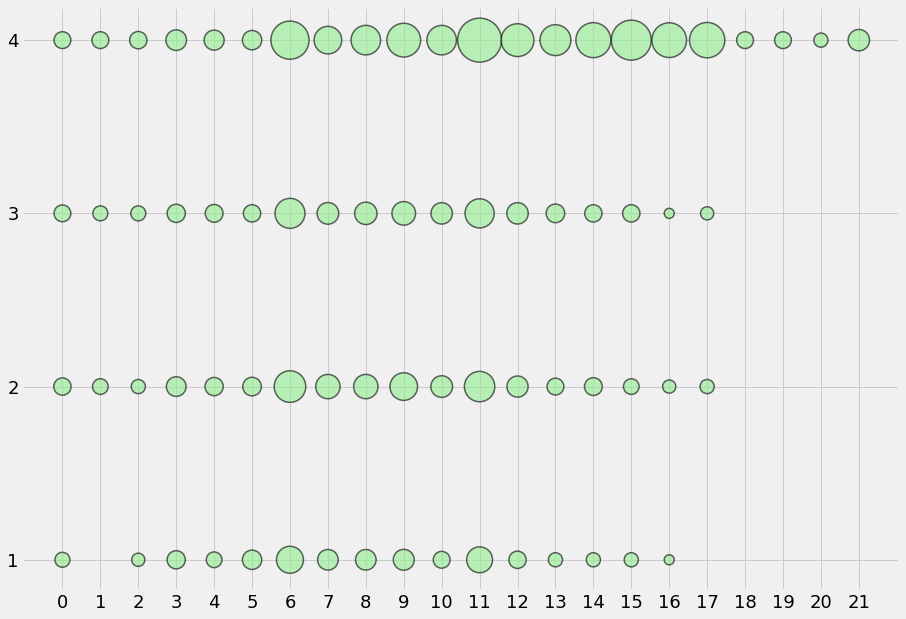

In [130]:
plot_categoricals('escolari-max','Target',final, annotate=False)

Text(0.5, 1.0, 'Max Schooling by Target')

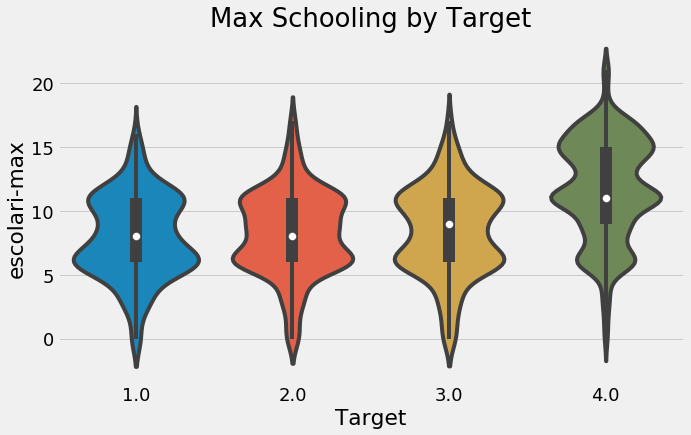

In [131]:
plt.figure(figsize = (10,6))
sns.violinplot(x = 'Target',y = 'escolari-max',data = final)
plt.title('Max Schooling by Target')

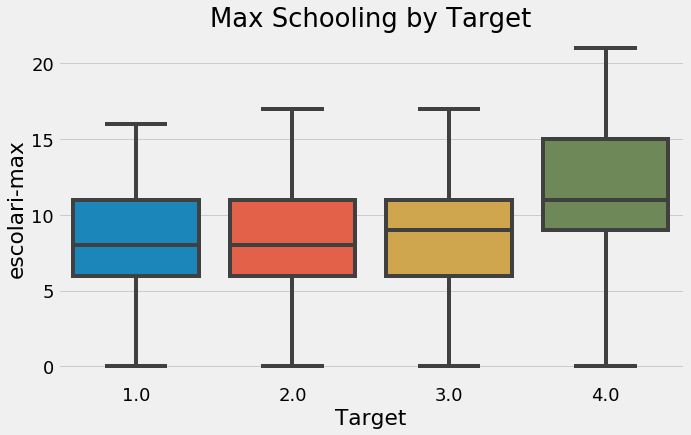

In [132]:
plt.figure(figsize = (10, 6))
sns.boxplot(x = 'Target', y = 'escolari-max', data = final);
plt.title('Max Schooling by Target');

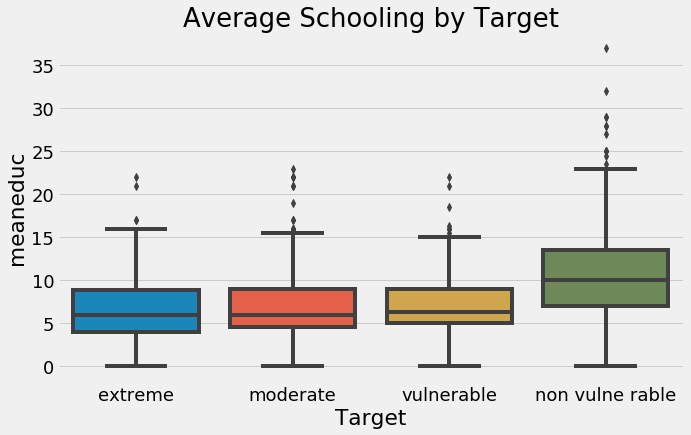

In [133]:
plt.figure(figsize = (10, 6))
sns.boxplot(x = 'Target', y = 'meaneduc', data = final);
plt.xticks([0, 1, 2, 3], poverty_mapping.values())
plt.title('Average Schooling by Target');

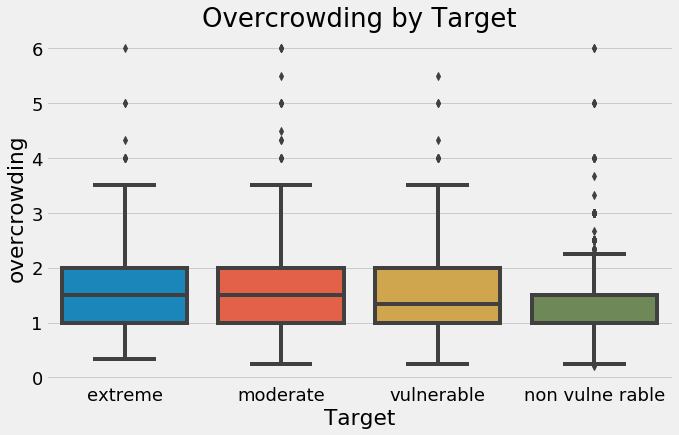

In [134]:
plt.figure(figsize = (10, 6))
sns.boxplot(x = 'Target', y = 'overcrowding', data = final);
plt.xticks([0, 1, 2, 3], poverty_mapping.values())
plt.title('Overcrowding by Target');

In [135]:
head_gender = ind.loc[ind['parentesco1'] == 1, ['idhogar','female']]
final = final.merge(head_gender, on = 'idhogar', how = 'left').rename(columns = {'female' : 'female-head'})
final.groupby('female-head')['Target'].value_counts(normalize = True)

female-head  Target
0            4.0       0.682873
             2.0       0.136464
             3.0       0.123204
             1.0       0.057459
1            4.0       0.617369
             2.0       0.167670
             3.0       0.113500
             1.0       0.101462
Name: Target, dtype: float64

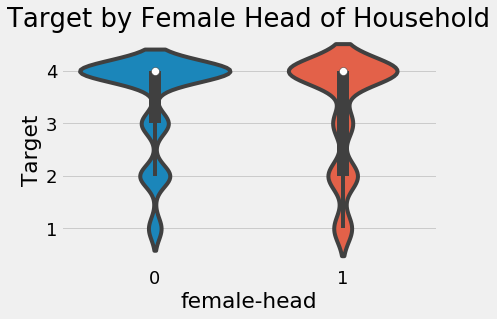

In [136]:
sns.violinplot(x = 'female-head', y = 'Target', data = final);
plt.title('Target by Female Head of Household');

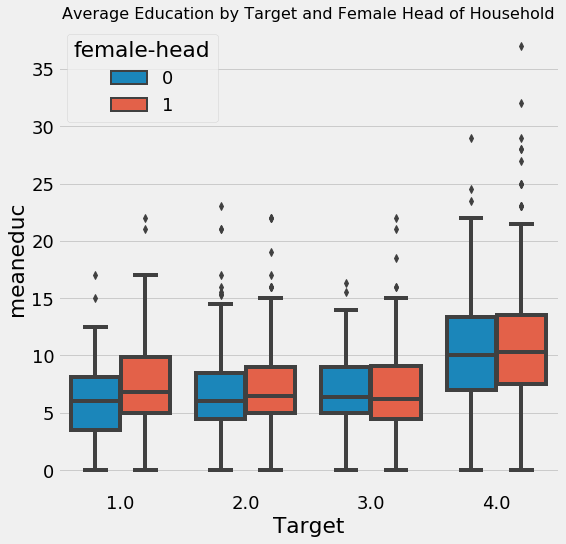

In [137]:
plt.figure(figsize = (8, 8))
sns.boxplot(x = 'Target', y = 'meaneduc', hue = 'female-head', data = final);
plt.title('Average Education by Target and Female Head of Household', size = 16);

In [138]:
final.groupby('female-head')['meaneduc'].agg(['mean', 'count'])

,mean,count
female-head,,
0,8.968025,6384
1,9.237013,3903


## Machine Learning Modeling

In [140]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, make_scorer
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline

scorer = make_scorer(f1_score,greater_is_better=True, average = 'macro')

In [142]:
train_labels = np.array(list(final[final['Target'].notnull()]['Target'].astype(np.uint8)))

train_set = final[final['Target'].notnull()].drop(columns = ['Id','idhogar','Target'])
test_set = final[final['Target'].isnull()].drop(columns= ['Id','idhogar','Target'])


In [143]:
submission_base = test[['Id', 'idhogar']].copy()

- 다른 모델들과의 비교를 위해 스케일링을 하는 것이 중요하다.
- 또한, 결측값때문에, imputer를 사용한다.
- 이 전에 pipeline을 만들 것이다. training 데이터에 적합시키고, train, test 데이터를 transoform하기위해 사용한다.

In [145]:
features = list(train_set.columns)

In [147]:
pipeline = Pipeline([('imputer',Imputer(strategy = 'median')),('scaler', MinMaxScaler())])
train_set = pipeline.fit_transform(train_set)
test_set = pipeline.fit_transform(test_set)

In [148]:
model = RandomForestClassifier(n_estimators=100, random_state=10, n_jobs=-1)

cv_score = cross_val_score(model,train_set,train_labels,cv = 10, scoring = scorer)

print(f'10 Fold Cross Validation F1 Score = {round(cv_score.mean(), 4)} with std = {round(cv_score.std(), 4)}')

10 Fold Cross Validation F1 Score = 0.3439 with std = 0.0313


- score가 좋지는 않지만, baseline으로는 괜찮다.

### Feature Importances

- 트리 기반 모델에서는 feature importance를 본다(모델에서 유용하지않은 변수들의 순위를 볼 수 있다.)

In [149]:
model.fit(train_set,train_labels)

feature_importances = pd.DataFrame({'feature' : features, 'importance' : model.feature_importances_})
feature_importances.head()

,feature,importance
0,hacdor,0.000643
1,hacapo,0.000283
2,v14a,0.000460
3,refrig,0.001798
4,paredblolad,0.006024


In [154]:
def plot_feature_importances(df, n = 10, threshold = None) :
    plt.style.use('fivethirtyeight')
    
    # Sort features with most important at the head
    df = df.sort_values('importance', ascending = False).reset_index(drop = True)
    
    # Normalize the feature importances to add up to one and calculate cumulative importance
    df['importance_normalized'] = df['importance'] / df['importance'].sum()
    df['cumulative_importance'] = np.cumsum(df['importance_normalized'])
    
    plt.rcParams['font.size'] = 12
    
    # Bar plot of n most important features
    df.loc[:n, :].plot.barh(y = 'importance_normalized', 
                            x = 'feature', color = 'darkgreen', 
                            edgecolor = 'k', figsize = (12, 8),
                            legend = False, linewidth = 2)

    plt.xlabel('Normalized Importance', size = 18); plt.ylabel(''); 
    plt.title(f'{n} Most Important Features', size = 18)
    plt.gca().invert_yaxis()
    
    
    if threshold:
        # Cumulative importance plot
        plt.figure(figsize = (8, 6))
        plt.plot(list(range(len(df))), df['cumulative_importance'], 'b-')
        plt.xlabel('Number of Features', size = 16); plt.ylabel('Cumulative Importance', size = 16); 
        plt.title('Cumulative Feature Importance', size = 18);
        
        # Number of features needed for threshold cumulative importance
        # This is the index (will need to add 1 for the actual number)
        importance_index = np.min(np.where(df['cumulative_importance'] > threshold))
        
        # Add vertical line to plot
        plt.vlines(importance_index + 1, ymin = 0, ymax = 1.05, linestyles = '--', colors = 'red')
        plt.show();
        
        print('{} features required for {:.0f}% of cumulative importance.'.format(importance_index + 1, 
                                                                                  100 * threshold))
    
    return df

AttributeError: 'int' object has no attribute 'max'

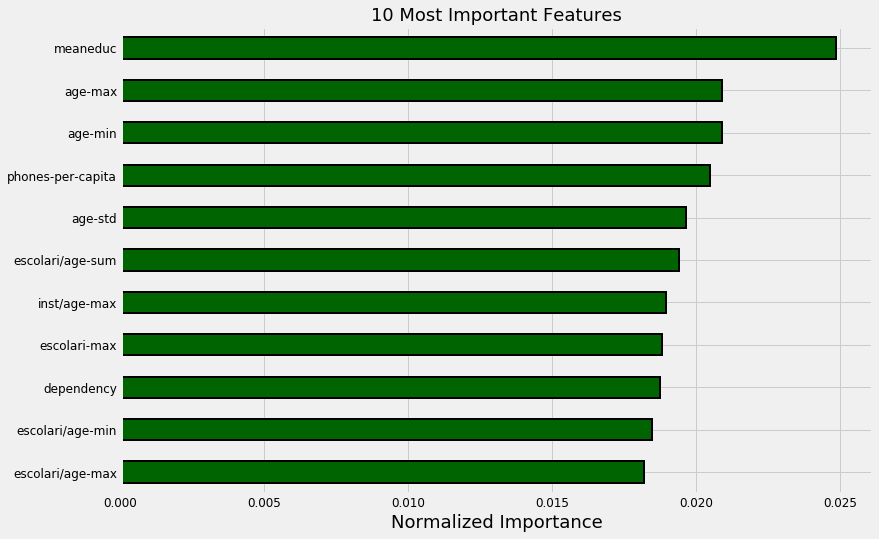

<Figure size 576x432 with 0 Axes>

In [155]:
norm_fi = plot_feature_importances(feature_importances,threshold=0.95)

- feature importance는 그 변수가 중요하다고 말해주는 것이 아니라, 모델을 만들 때 관련있는 것이라는 것을 말해준다.

In [156]:
def kde_target(df, variable) :
    colors = {1 : 'red',2 :'orange',3 :'blue',4 : 'green'}
    
    plt.figure(figsize = (12,8))
    
    df = df[df['Target'].notnull()]
    
    for level in df['Target'].unique() :
        subset = df[df['Target'] ==  level].copy()
        sns.kdeplot(subset[variable].dropna(),
                   label = f'Poverty Level : {level}',
                   color = colors[int(subset['Target'].unique())])
        
    plt.xlabel(variable)
    plt.ylabel('Density')
    plt.title('{} Distribution'.format(variable.capitalize()))

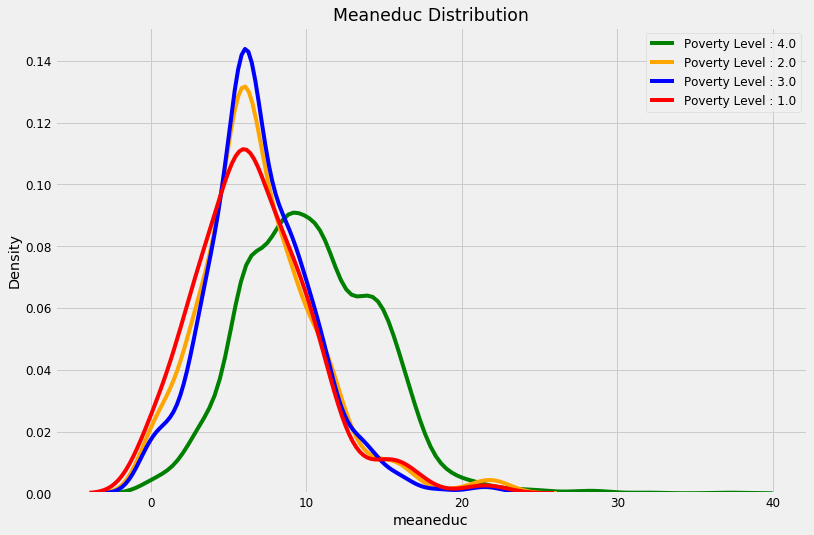

In [157]:
kde_target(final,'meaneduc')

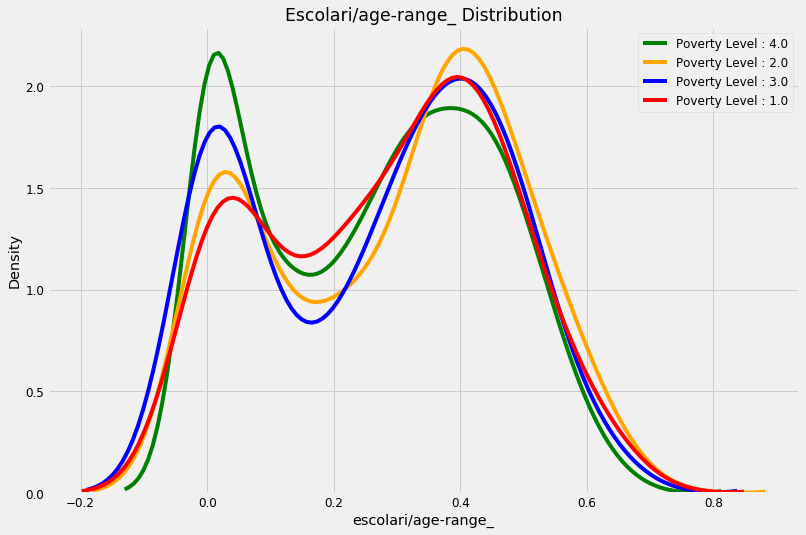

In [158]:
kde_target(final,'escolari/age-range_')

## Model Selection

In [160]:
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegressionCV, RidgeClassifierCV
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier

In [161]:
from sklearn.exceptions import ConvergenceWarning

In [162]:
warnings.filterwarnings('ignore',category=ConvergenceWarning)
warnings.filterwarnings('ignore',category=DeprecationWarning)
warnings.filterwarnings('ignore',category=UserWarning)

In [168]:
model_results = pd.DataFrame(columns=['model','cv_mean','cv_std'])

def cv_model(train,train_labels,model, name, model_results = None) :
    cv_scores = cross_val_score(model, train, train_labels, cv = 10, scoring =scorer, n_jobs= -1)
    print(f'10 Fold CV Score: {round(cv_scores.mean(), 5)} with std: {round(cv_scores.std(), 5)}')    
    
    if model_results is not None :
        model_results = model_results.append(pd.DataFrame({'model' : name,
                                                          'cv_mean' : cv_scores.mean(),
                                                          'cv_std':cv_scores.std()},
                                                         index = [0]))
        
        return model_results

In [169]:
model_results = cv_model(train_set, train_labels, LinearSVC(),'LSVC',model_results)

10 Fold CV Score: 0.28346 with std: 0.04484


In [170]:
model_results = cv_model(train_set, train_labels, 
                         GaussianNB(), 'GNB', model_results)

10 Fold CV Score: 0.17935 with std: 0.03867


In [171]:
model_results = cv_model(train_set, train_labels, 
                         MLPClassifier(hidden_layer_sizes=(32, 64, 128, 64, 32)),
                         'MLP', model_results)

10 Fold CV Score: 0.31021 with std: 0.0377


In [172]:
model_results = cv_model(train_set, train_labels, 
                          LinearDiscriminantAnalysis(), 
                          'LDA', model_results)

10 Fold CV Score: 0.32217 with std: 0.05984


In [173]:
model_results = cv_model(train_set, train_labels, 
                         RidgeClassifierCV(), 'RIDGE', model_results)

10 Fold CV Score: 0.27896 with std: 0.03675


In [174]:
for n in [5,10, 20] :
    print(f'\nKNN with {n} neighbors\n')
    model_results = cv_model(train_set, train_labels,
                            KNeighborsClassifier(n_neighbors = n),
                            f'knn-{n}',model_results)


KNN with 5 neighbors

10 Fold CV Score: 0.35078 with std: 0.03829

KNN with 10 neighbors

10 Fold CV Score: 0.32153 with std: 0.03028

KNN with 20 neighbors

10 Fold CV Score: 0.31039 with std: 0.04974


In [175]:
from sklearn.ensemble import ExtraTreesClassifier
model_results = cv_model(train_set, train_labels, ExtraTreesClassifier(n_estimators=100, random_state=10),
                        'EXT',model_results)

10 Fold CV Score: 0.32215 with std: 0.04671


## Comparing Model Performance

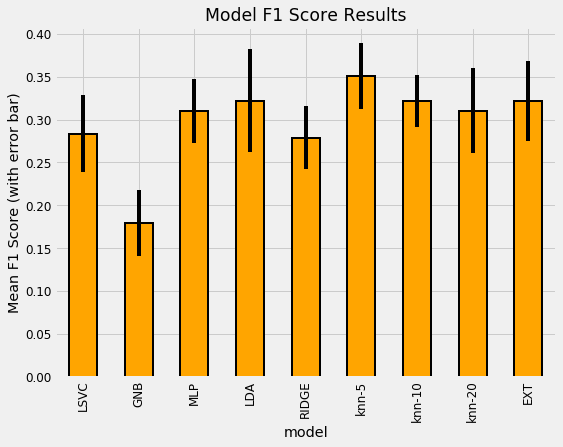

In [182]:
model_results.set_index('model',inplace=True)
model_results['cv_mean'].plot.bar(color = 'orange',figsize = (8,6),
                                 yerr = list(model_results['cv_std']),
                                 edgecolor = 'k', linewidth = 2)
plt.title('Model F1 Score Results');
plt.ylabel('Mean F1 Score (with error bar)');
model_results.reset_index(inplace = True)

## Making a Submission

In [183]:
test_ids = list(final.loc[final['Target'].isnull(),'idhogar'])

In [185]:
def submit(model,train,train_labels, test, test_ids) :
    model.fit(train, train_labels)
    predictions = model.predict(test)
    predictions = pd.DataFrame({'idhogar' : test_ids,
                               'Target' : predictions})
    
    submission = submission_base.merge(predictions, on ='idhogar',how = 'left').drop(columns = ['idhogar'])
    
    submission['Target'] = submission['Target'].fillna(4).astype(np.int8)
    return submission

## Feature Selection

- 모델 성능을 향상시키기 위한 잠재적 방법이다.

In [186]:
train_set = pd.DataFrame(train_set, columns = features)

corr_matrix = train_set.corr()

upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape),k = 1).astype(np.bool))

to_drop = [column for column in upper.columns if any(abs(upper[column]) > 0.95)]
to_drop

['coopele', 'elec', 'v18q-count', 'female-sum']

In [187]:
train_set.drop(columns=to_drop, inplace = True)

train_set.shape

(2973, 222)

In [188]:
test_set = pd.DataFrame(test_set, columns = features)
train_set, test_set = train_set.align(test_set, axis = 1, join = 'inner')
features = list(train_set.columns)

### Recursive Feature Elimination(RFE) with Random Forest

- 모든 변수를 우선 다 포함시킨 후 반복해서 학습을 진행하면서 중요도가 낮은 변수를 하나씩 제거하는 방식이다.

In [189]:
from sklearn.feature_selection import RFECV

In [190]:
estimator = RandomForestClassifier(random_state=10, n_estimators=100, n_jobs=-1)

selector = RFECV(estimator,step = 1, cv = 3, scoring = scorer, n_jobs= -1 )

In [191]:
selector.fit(train_set,train_labels)

RFECV(cv=3,
      estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                       criterion='gini', max_depth=None,
                                       max_features='auto', max_leaf_nodes=None,
                                       min_impurity_decrease=0.0,
                                       min_impurity_split=None,
                                       min_samples_leaf=1, min_samples_split=2,
                                       min_weight_fraction_leaf=0.0,
                                       n_estimators=100, n_jobs=-1,
                                       oob_score=False, random_state=10,
                                       verbose=0, warm_start=False),
      min_features_to_select=1, n_jobs=-1,
      scoring=make_scorer(f1_score, average=macro), step=1, verbose=0)

58

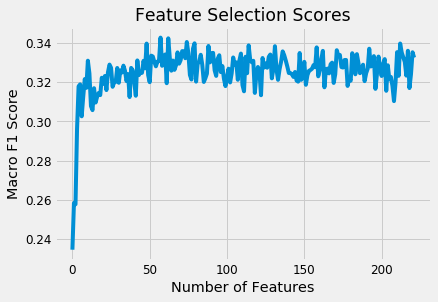

In [192]:
plt.plot(selector.grid_scores_);

plt.xlabel('Number of Features'); plt.ylabel('Macro F1 Score'); plt.title('Feature Selection Scores');
selector.n_features_

In [193]:
rankings = pd.DataFrame({'feature': list(train_set.columns), 'rank': list(selector.ranking_)}).sort_values('rank')
rankings.head(10)

,feature,rank
73,r4h2,1
173,instlevel3-std,1
130,estadocivil7-std,1
129,estadocivil7-sum,1
198,escolari-sum,1
197,escolari-max,1
86,bedrooms,1
177,instlevel4-std,1
109,female-std,1
187,instlevel8-sum,1


In [194]:
train_selected = selector.transform(train_set)
test_selected = selector.transform(test_set)

In [195]:
selected_features = train_set.columns[np.where(selector.ranking_ == 1)]
train_selected = pd.DataFrame(train_selected,columns = selected_features)
test_selected = pd.DataFrame(test_selected,columns=selected_features)

In [196]:
model_results = cv_model(train_selected,train_labels,model,'RF-SEL',model_results)

10 Fold CV Score: 0.36248 with std: 0.0529
